In [1]:
import sys
import os

# Add the build directory to Python path
build_dir = os.path.abspath('/Users/kisel/uni/apal/Algorithm-Selector/Implementation/lib')
sys.path.insert(0, build_dir)

# Add the data directory to Python path
data_dir = os.path.abspath('/Users/kisel/uni/apal/Algorithm-Selector/Implementation/data')
sys.path.insert(0, data_dir)

import pandas as pd
import numpy as np
from tqdm import tqdm

import sorters
import probes
import time

import list_generators as lg

In [2]:
data = pd.read_feather("/Users/kisel/uni/apal/Algorithm-Selector/Implementation/data/out.feather")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33517 entries, 0 to 33516
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    33517 non-null  object
dtypes: object(1)
memory usage: 262.0+ KB


In [3]:
df = data.head(5000)
df

data
0                                                    []
1     [0, 1, 2, 3, 4, 5, 6, 13, 8, 9, 44, 11, 12, 7,...
2     [47, 46, 45, 10, 43, 42, 41, 40, 39, 38, 37, 3...
3     [0, 1, 2, 3, 4, 5, 6, 7, 33, 9, 10, 11, 12, 13...
4     [47, 46, 45, 44, 43, 42, 24, 21, 39, 38, 37, 3...
...                                                 ...
4995  [1234, 1234, 1233, 1232, 1231, 1230, 1229, 122...
4996  [0, 908, 2, 429, 4, 5, 6, 7, 8, 9, 10, 11, 12,...
4997  [1234, 1234, 1233, 653, 1231, 1230, 1229, 1228...
4998  [0, 1, 2, 3, 4, 752, 6, 7, 8, 9, 10, 11, 78, 1...
4999  [1234, 681, 1233, 1232, 1102, 1230, 1229, 1228...

[5000 rows x 1 columns]

In [4]:
from tqdm import tqdm
tqdm.pandas()  

for sorter in tqdm(sorters.list_sorters()):
    df[sorter] = df['data'].progress_apply(lambda lst: sorters.benchmark_sorter(sorter, lst))

100%|██████████| 5000/5000 [00:00<00:00, 24890.45it/s]
/var/folders/0h/ch124vqs7dj_96gjw7qq3ksh0000gn/T/ipykernel_95655/1088227320.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[sorter] = df['data'].progress_apply(lambda lst: sorters.benchmark_sorter(sorter, lst))
100%|██████████| 5000/5000 [00:00<00:00, 26757.31it/s]
/var/folders/0h/ch124vqs7dj_96gjw7qq3ksh0000gn/T/ipykernel_95655/1088227320.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[sorter] = df['data'].progress_apply(lambda lst: sorte

In [5]:
df.head()

data  adaptive_shivers_sort  \
0                                                 []               0.000459   
1  [0, 1, 2, 3, 4, 5, 6, 13, 8, 9, 44, 11, 12, 7,...               0.001833   
2  [47, 46, 45, 10, 43, 42, 41, 40, 39, 38, 37, 3...               0.001625   
3  [0, 1, 2, 3, 4, 5, 6, 7, 33, 9, 10, 11, 12, 13...               0.000875   
4  [47, 46, 45, 44, 43, 42, 24, 21, 39, 38, 37, 3...               0.001292   

   cartesian_tree_sort  counting_sort  heap_sort  insertion_sort  mel_sort  \
0             0.000125       0.000166   0.000250        0.000125  0.000250   
1             0.002250       0.000500   0.001083        0.000250  0.002166   
2             0.001166       0.000334   0.001000        0.001083  0.001167   
3             0.001041       0.000250   0.000875        0.000417  0.001459   
4             0.001000       0.000167   0.000875        0.000917  0.001333   

   merge_sort  poplar_sort  quick_sort  quick_merge_sort  ska_sort  slab_sort  \
0    0.000250     0.003167    0.000292          0.000292  0.000250   0.002417   
1    0.000709     0.000958    0.000459          0.000833  0.000750   0.002625   
2    0.001166     0.001958    0.000625          0.000541  0.000417   0.001125   
3    0.000708     0.001375    0.000458          0.000500  0.000416   0.001333   
4    0.000875     0.001500    0.000583          0.000667  0.000709   0.001333   

   smooth_sort  spin_sort  splay_sort  spread_sort  std_sort  tim_sort  
0     0.000334   0.000333    0.000292     0.000250  0.003292  0.000083  
1     0.002833   0.000375    0.001459     0.000583  0.001500  0.000875  
2     0.003708   0.001416    0.001458     0.000458  0.000375  0.001708  
3     0.002417   0.000417    0.001666     0.000458  0.000458  0.000833  
4     0.003125   0.001083    0.001417     0.000625  0.000667  0.001250

In [10]:
import numpy as np

benchmark_cols = [col for col in df.columns if col != "data"]

always_worse = []  
very_similar = [] 

for i, sort_a in enumerate(benchmark_cols):
    for sort_b in benchmark_cols[i+1:]:
        if (df[sort_a] >= df[sort_b]).all() and (df[sort_a] > df[sort_b]).any():
            always_worse.append((sort_a, sort_b))
        elif (df[sort_b] >= df[sort_a]).all() and (df[sort_b] > df[sort_a]).any():
            always_worse.append((sort_b, sort_a))
        
        if np.allclose(df[sort_a], df[sort_b], rtol=1e-3, atol=1e-5):
            very_similar.append((sort_a, sort_b))

print("Always Worse Relationships (first element is always worse than the second):")
for worse, better in always_worse:
    print(f"{worse} is always worse than {better}")

print("\nVery Similar Pairs:")
for s1, s2 in very_similar:
    print(f"{s1} and {s2} are very similar")


Always Worse Relationships (first element is always worse than the second):
slab_sort is always worse than spread_sort

Very Similar Pairs:


                       adaptive_shivers_sort  cartesian_tree_sort  \
adaptive_shivers_sort               1.000000             0.896093   
cartesian_tree_sort                 0.896093             1.000000   
counting_sort                       0.357044             0.340310   
heap_sort                           0.880621             0.879057   
insertion_sort                      0.729963             0.693180   
mel_sort                            0.856450             0.888609   
merge_sort                          0.868824             0.876341   
poplar_sort                         0.731040             0.719977   
quick_sort                          0.859850             0.888893   
quick_merge_sort                    0.864586             0.893876   
ska_sort                            0.829526             0.810455   
slab_sort                           0.862266             0.915792   
smooth_sort                         0.909267             0.905048   
spin_sort                         

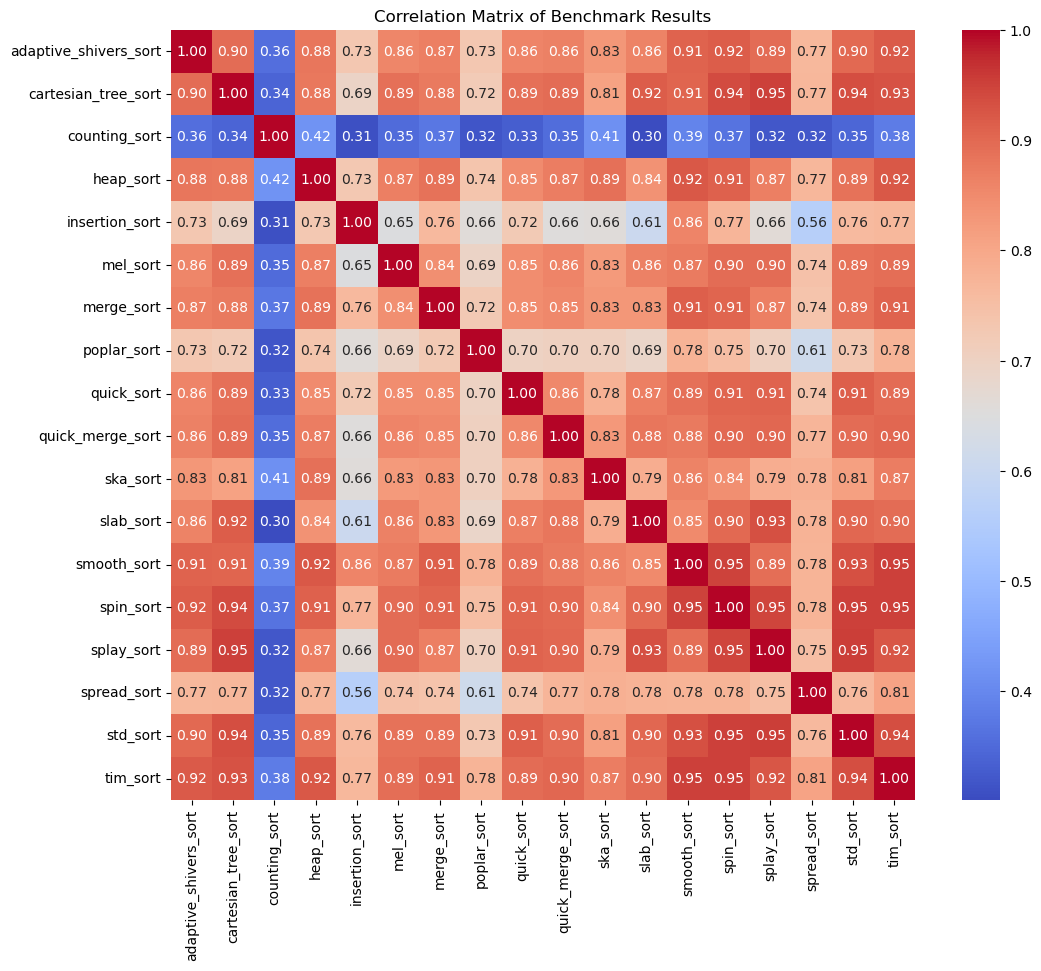

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.drop(columns=['data']).corr()

print(corr_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Benchmark Results")
plt.show()

In [15]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
upper_tri = corr_matrix.where(mask)
sorted_corrs = upper_tri.stack().abs().sort_values(ascending=False)

print("Highest correlations between sorter benchmarks:")
print(sorted_corrs)

Highest correlations between sorter benchmarks:
splay_sort           std_sort          0.953662
spin_sort            std_sort          0.953581
                     tim_sort          0.953481
cartesian_tree_sort  splay_sort        0.952147
smooth_sort          tim_sort          0.951170
                                         ...   
counting_sort        splay_sort        0.320530
                     spread_sort       0.320011
                     poplar_sort       0.315720
                     insertion_sort    0.309111
                     slab_sort         0.301587
Length: 153, dtype: float64


High correlation pairs (corr > 0.9):
adaptive_shivers_sort and smooth_sort (corr = 0.91)
adaptive_shivers_sort and spin_sort (corr = 0.92)
adaptive_shivers_sort and std_sort (corr = 0.90)
adaptive_shivers_sort and tim_sort (corr = 0.92)
cartesian_tree_sort and slab_sort (corr = 0.92)
cartesian_tree_sort and smooth_sort (corr = 0.91)
cartesian_tree_sort and spin_sort (corr = 0.94)
cartesian_tree_sort and splay_sort (corr = 0.95)
cartesian_tree_sort and std_sort (corr = 0.94)
cartesian_tree_sort and tim_sort (corr = 0.93)
heap_sort and smooth_sort (corr = 0.92)
heap_sort and spin_sort (corr = 0.91)
heap_sort and tim_sort (corr = 0.92)
merge_sort and smooth_sort (corr = 0.91)
merge_sort and spin_sort (corr = 0.91)
merge_sort and tim_sort (corr = 0.91)
quick_sort and spin_sort (corr = 0.91)
quick_sort and splay_sort (corr = 0.91)
quick_sort and std_sort (corr = 0.91)
quick_merge_sort and spin_sort (corr = 0.90)
quick_merge_sort and splay_sort (corr = 0.90)
quick_merge_sort and tim_sort (co

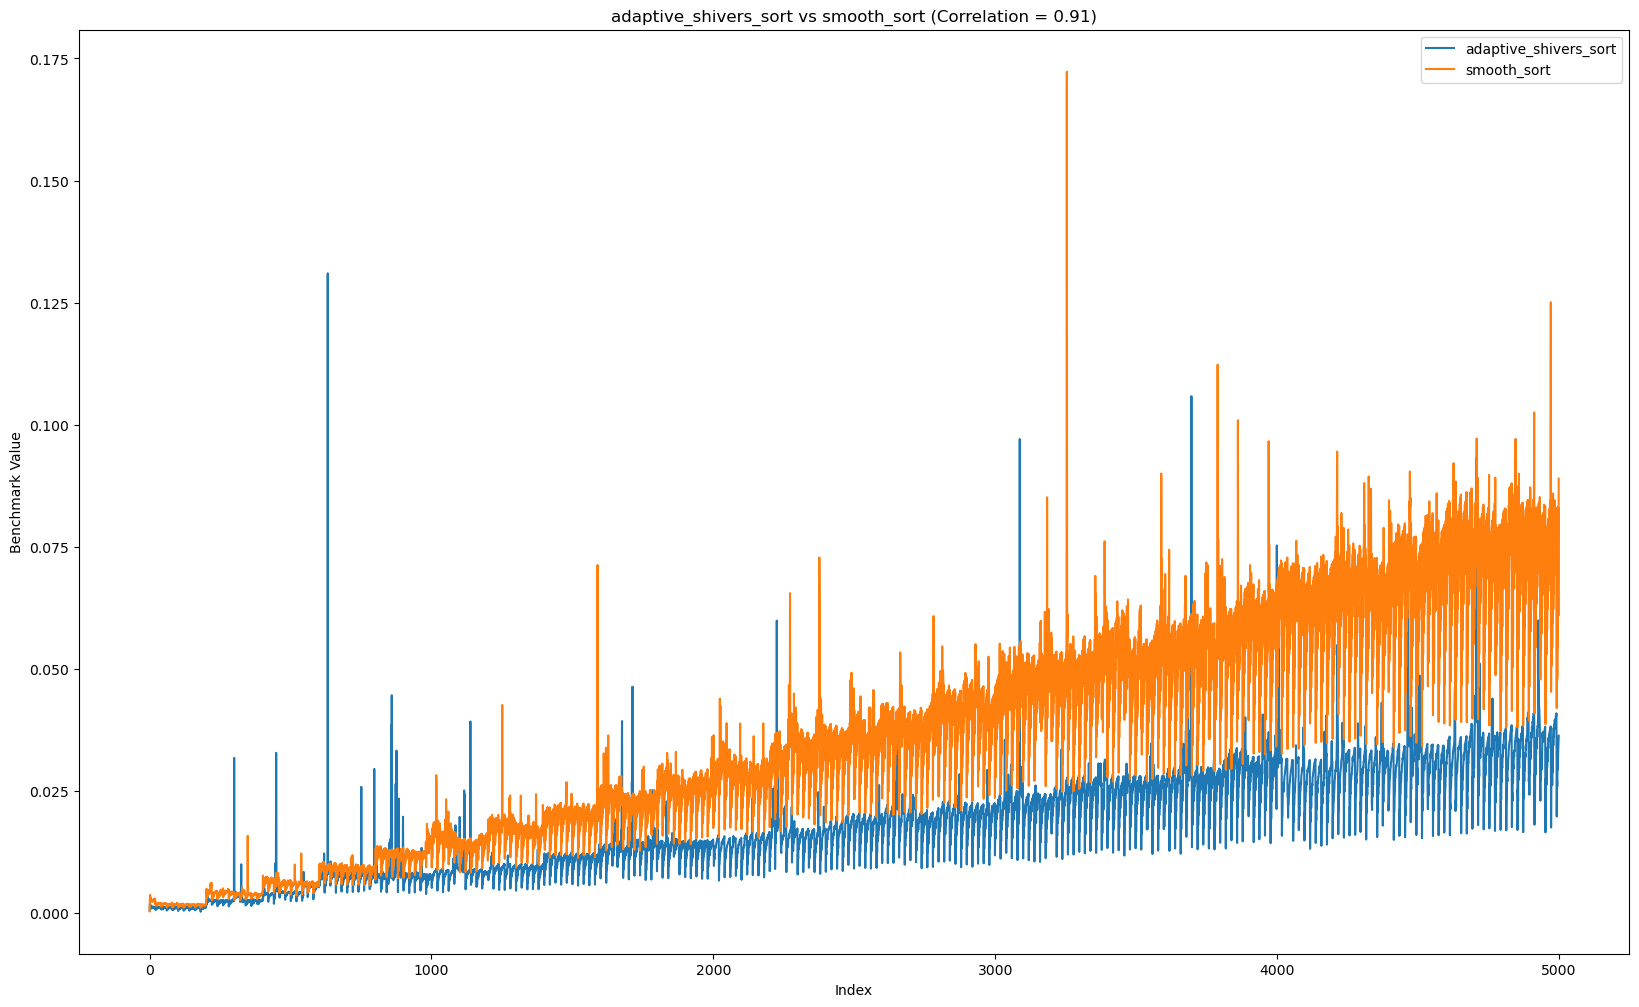

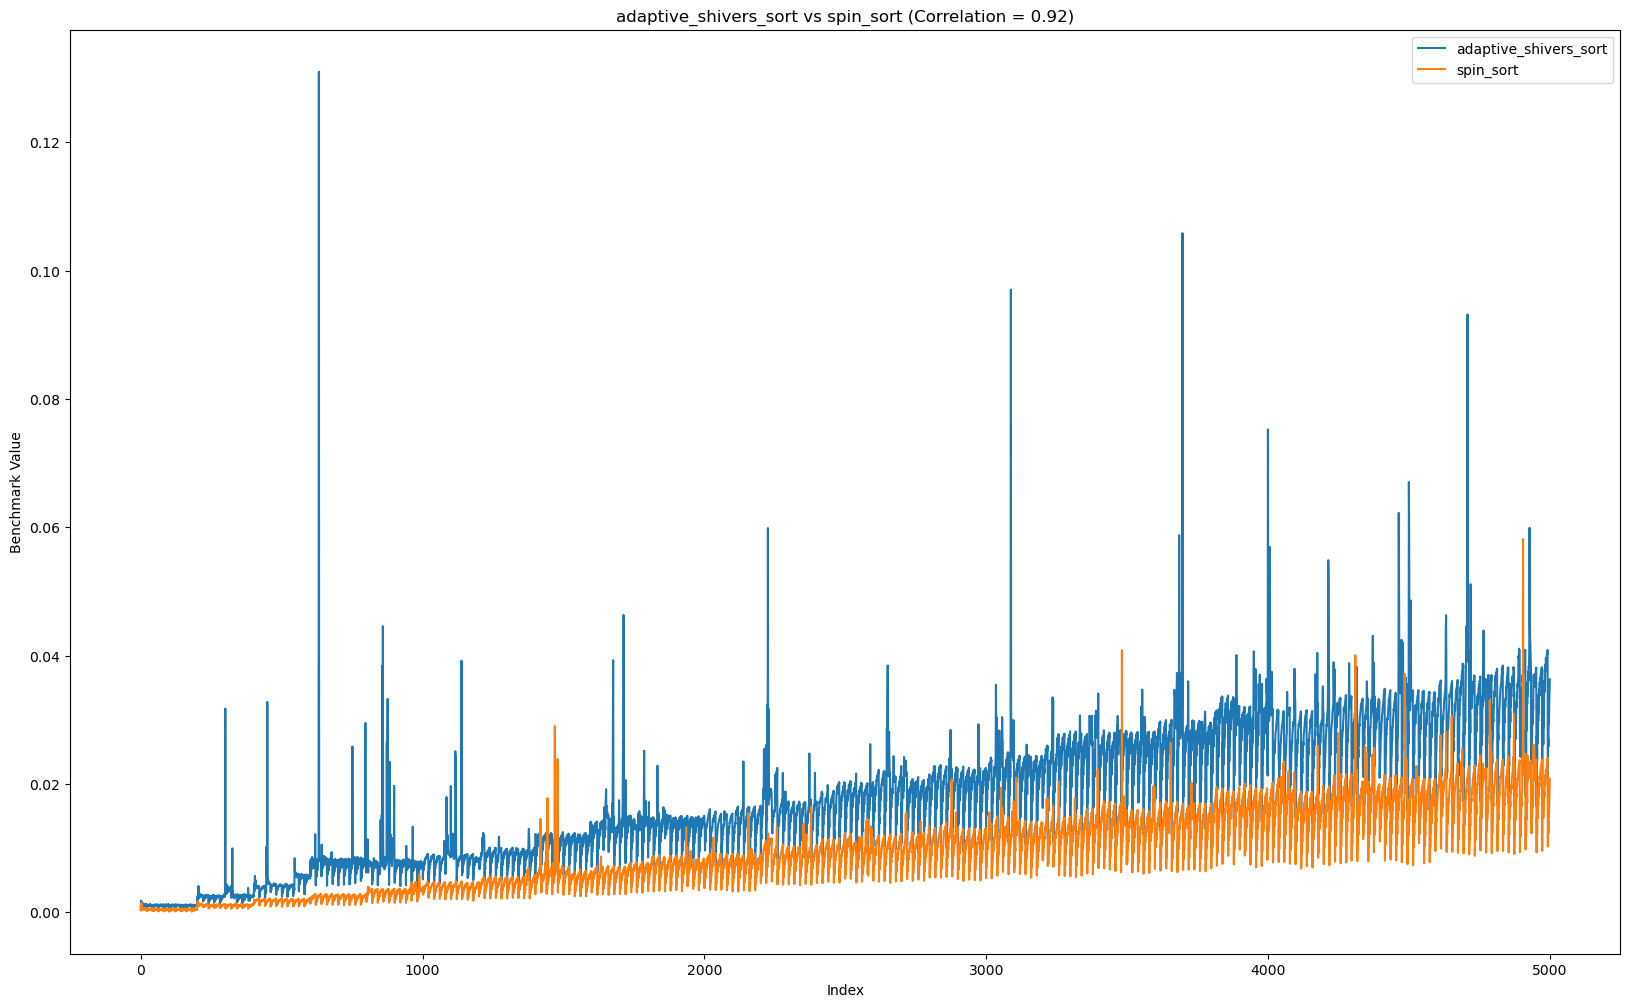

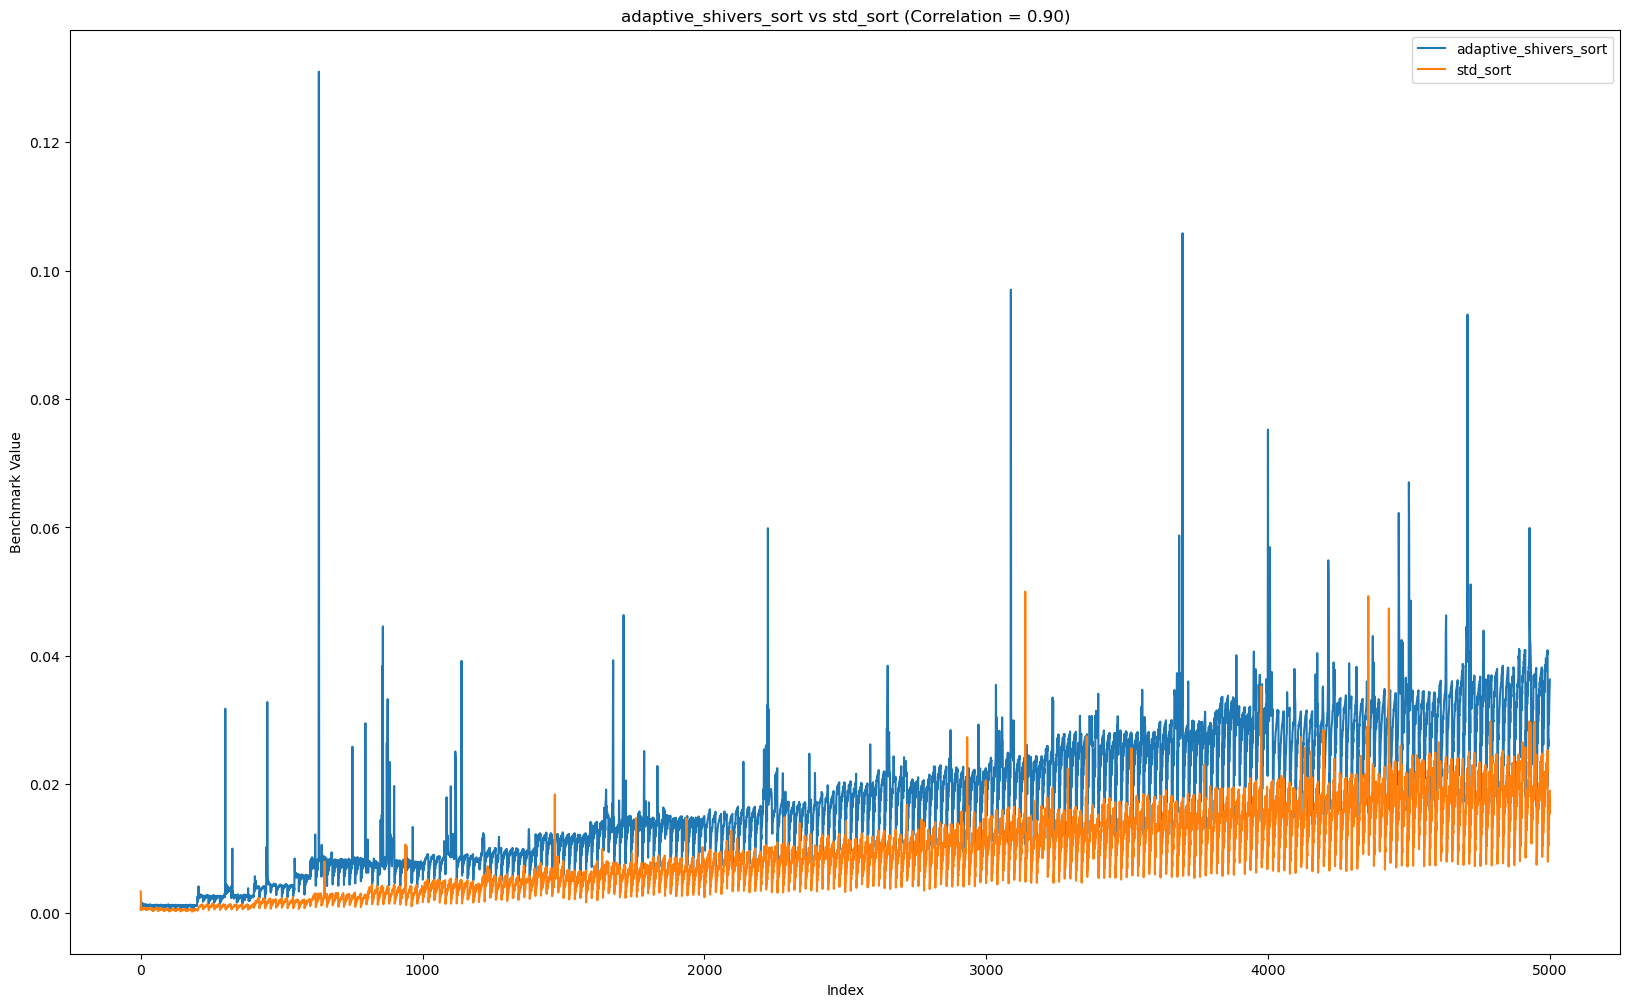

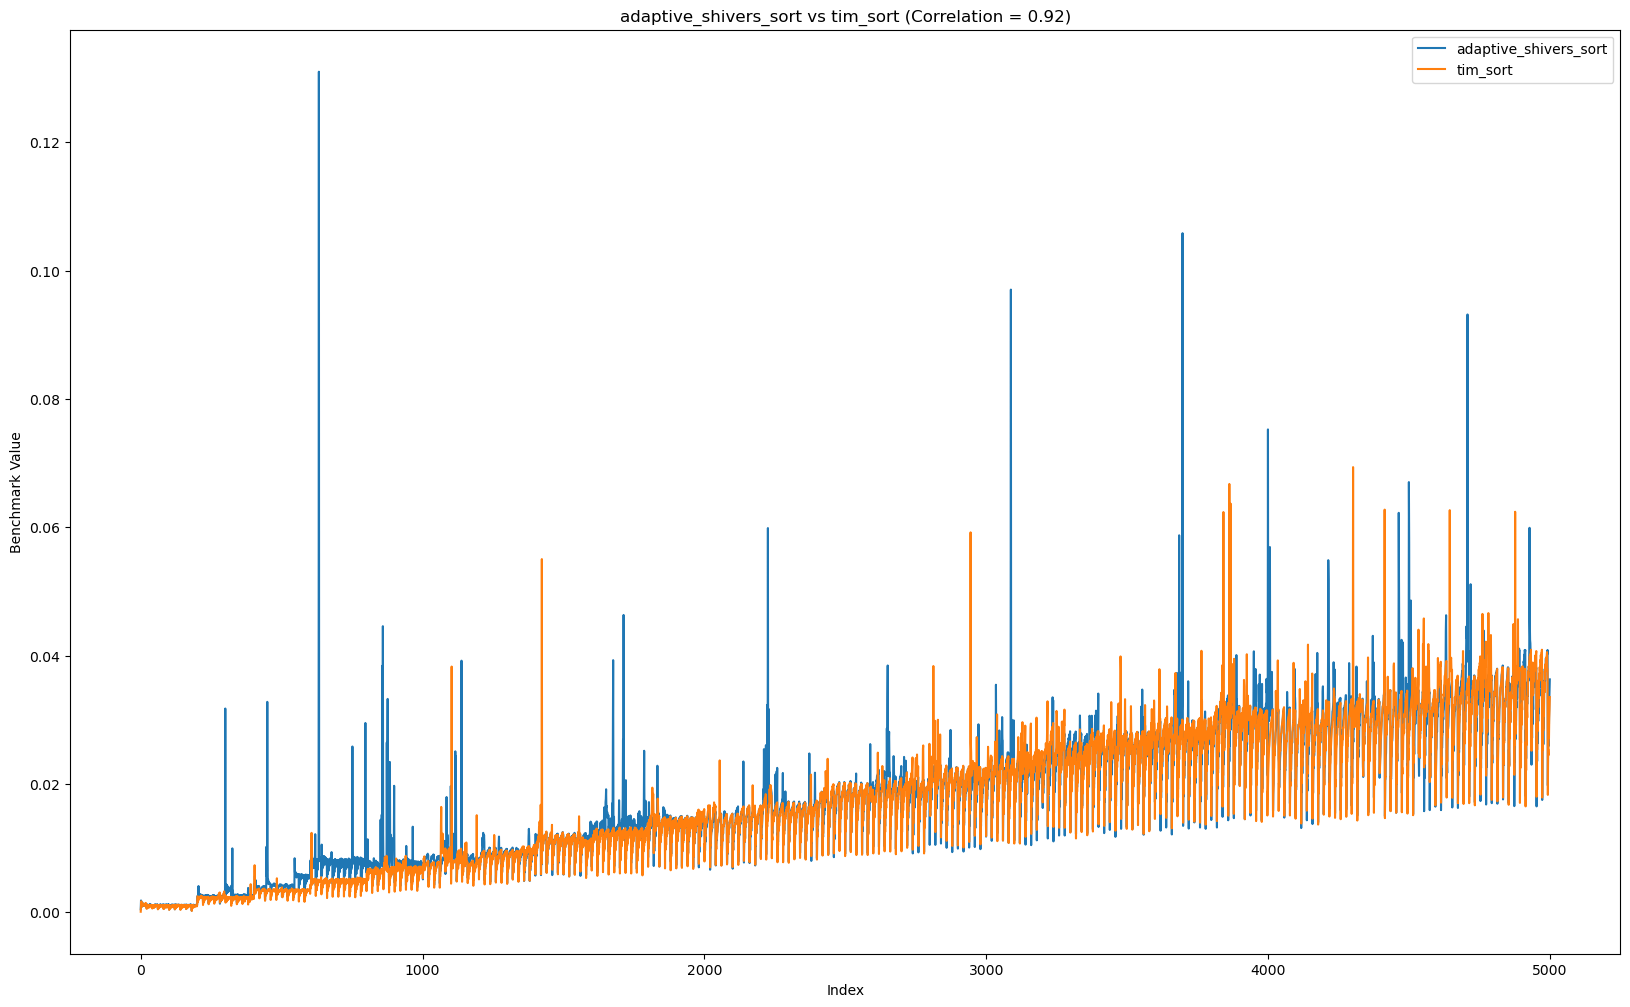

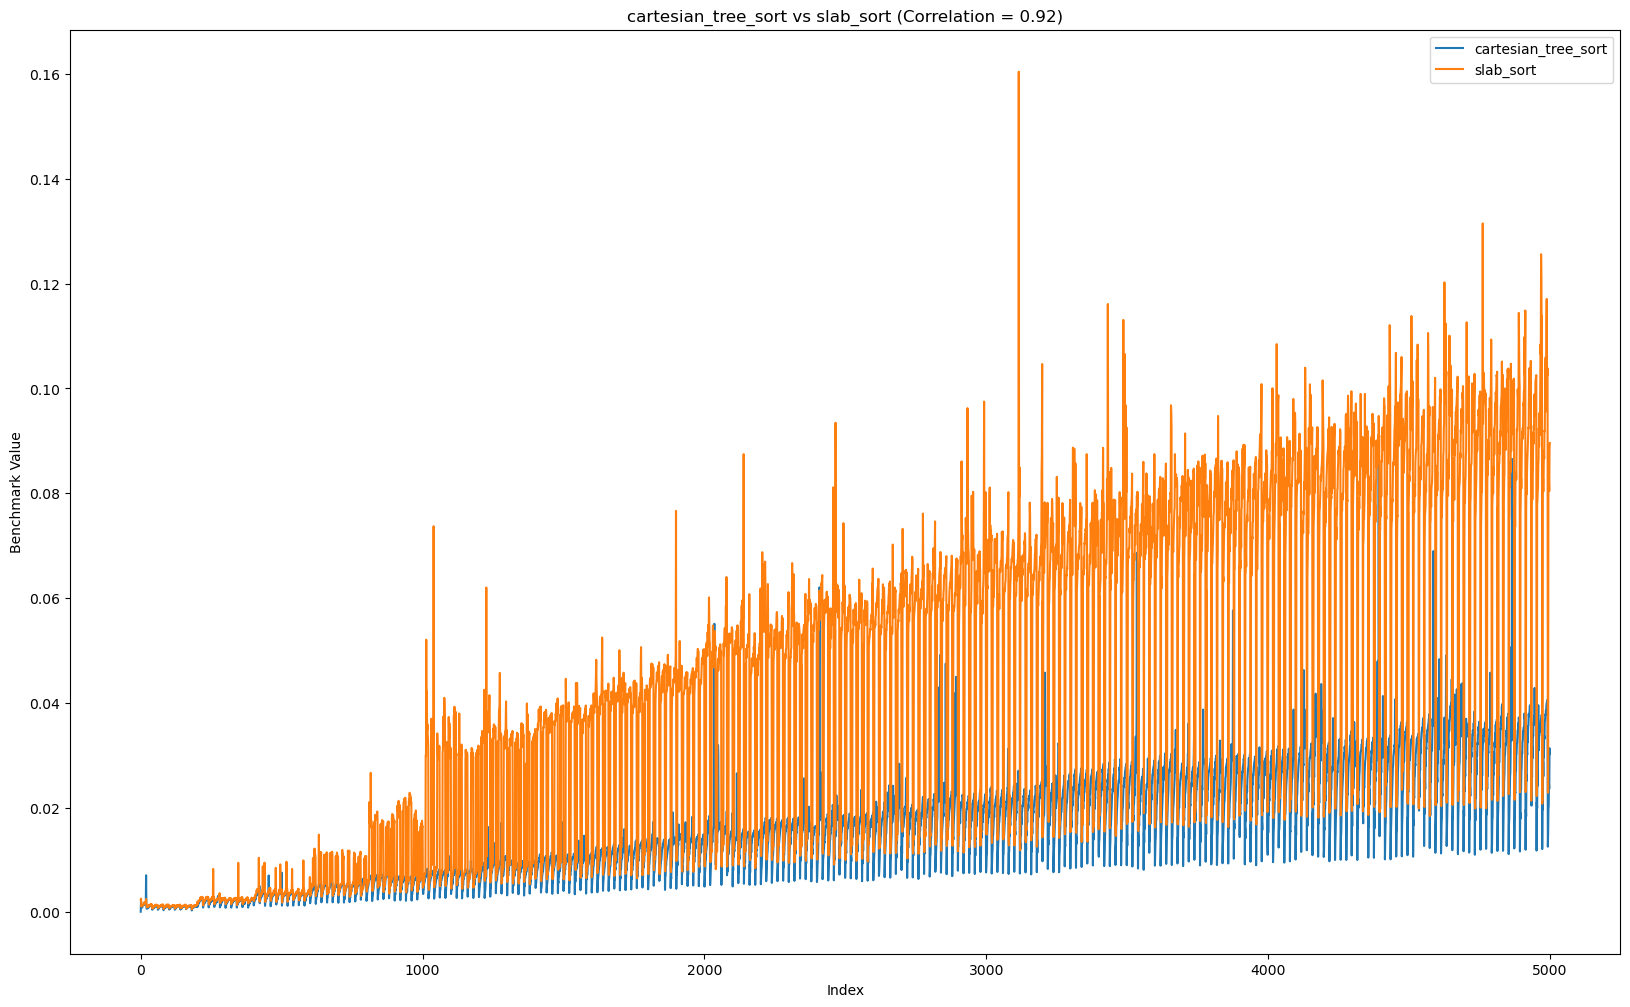

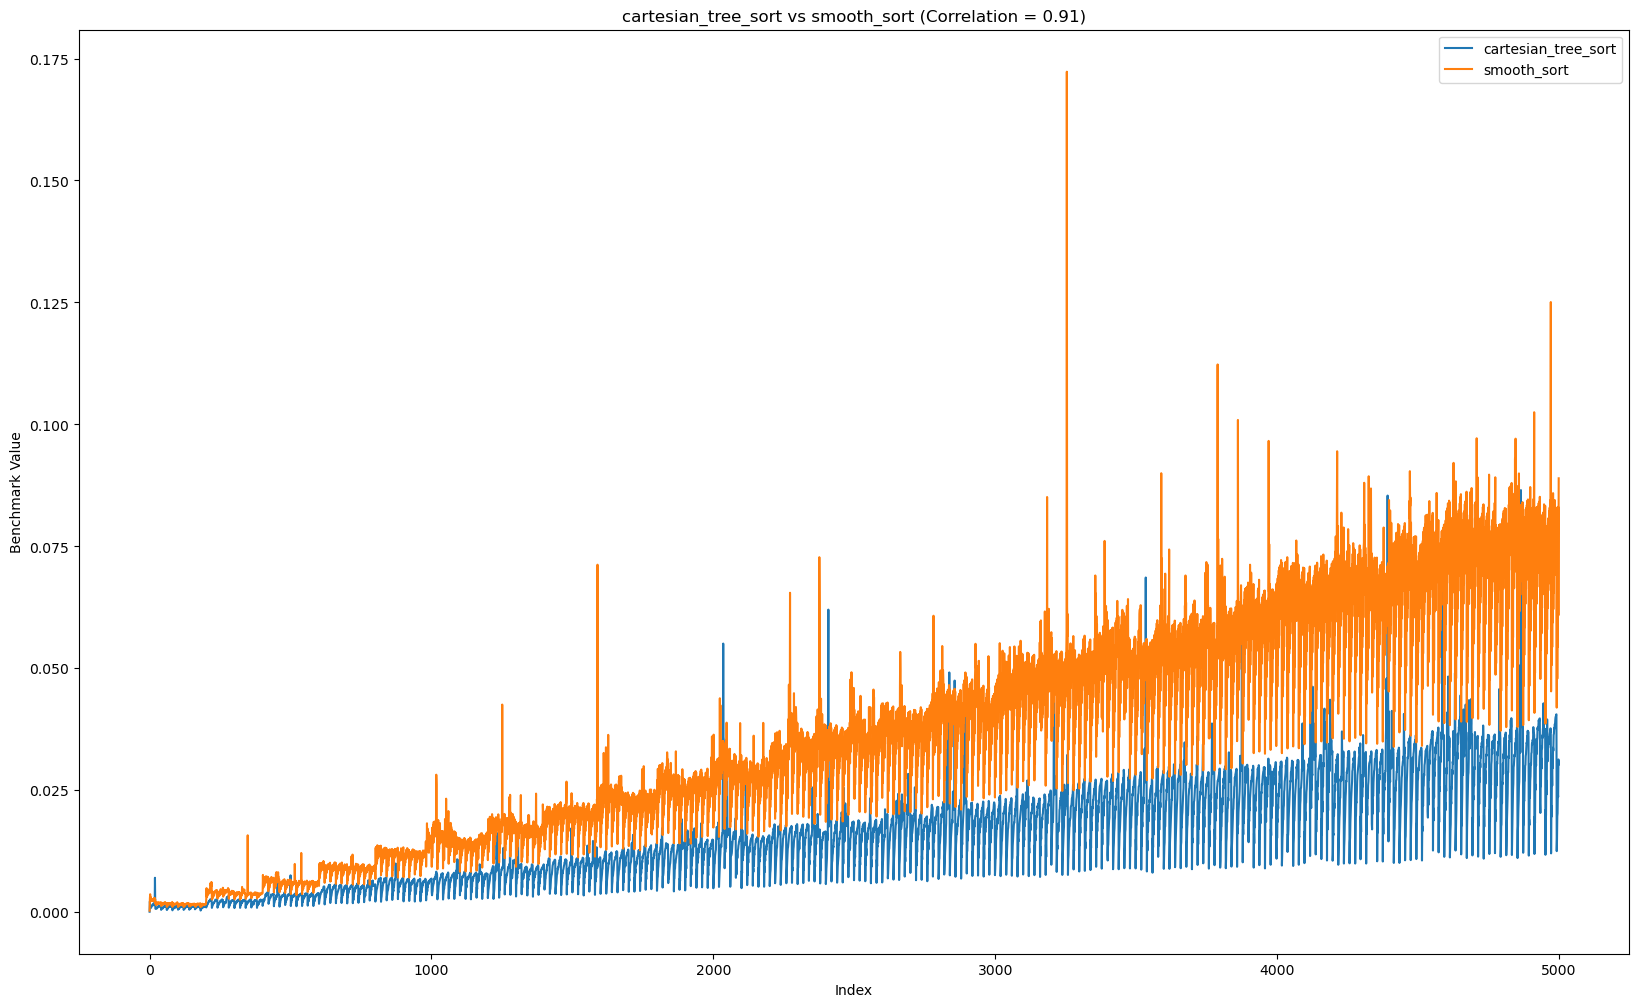

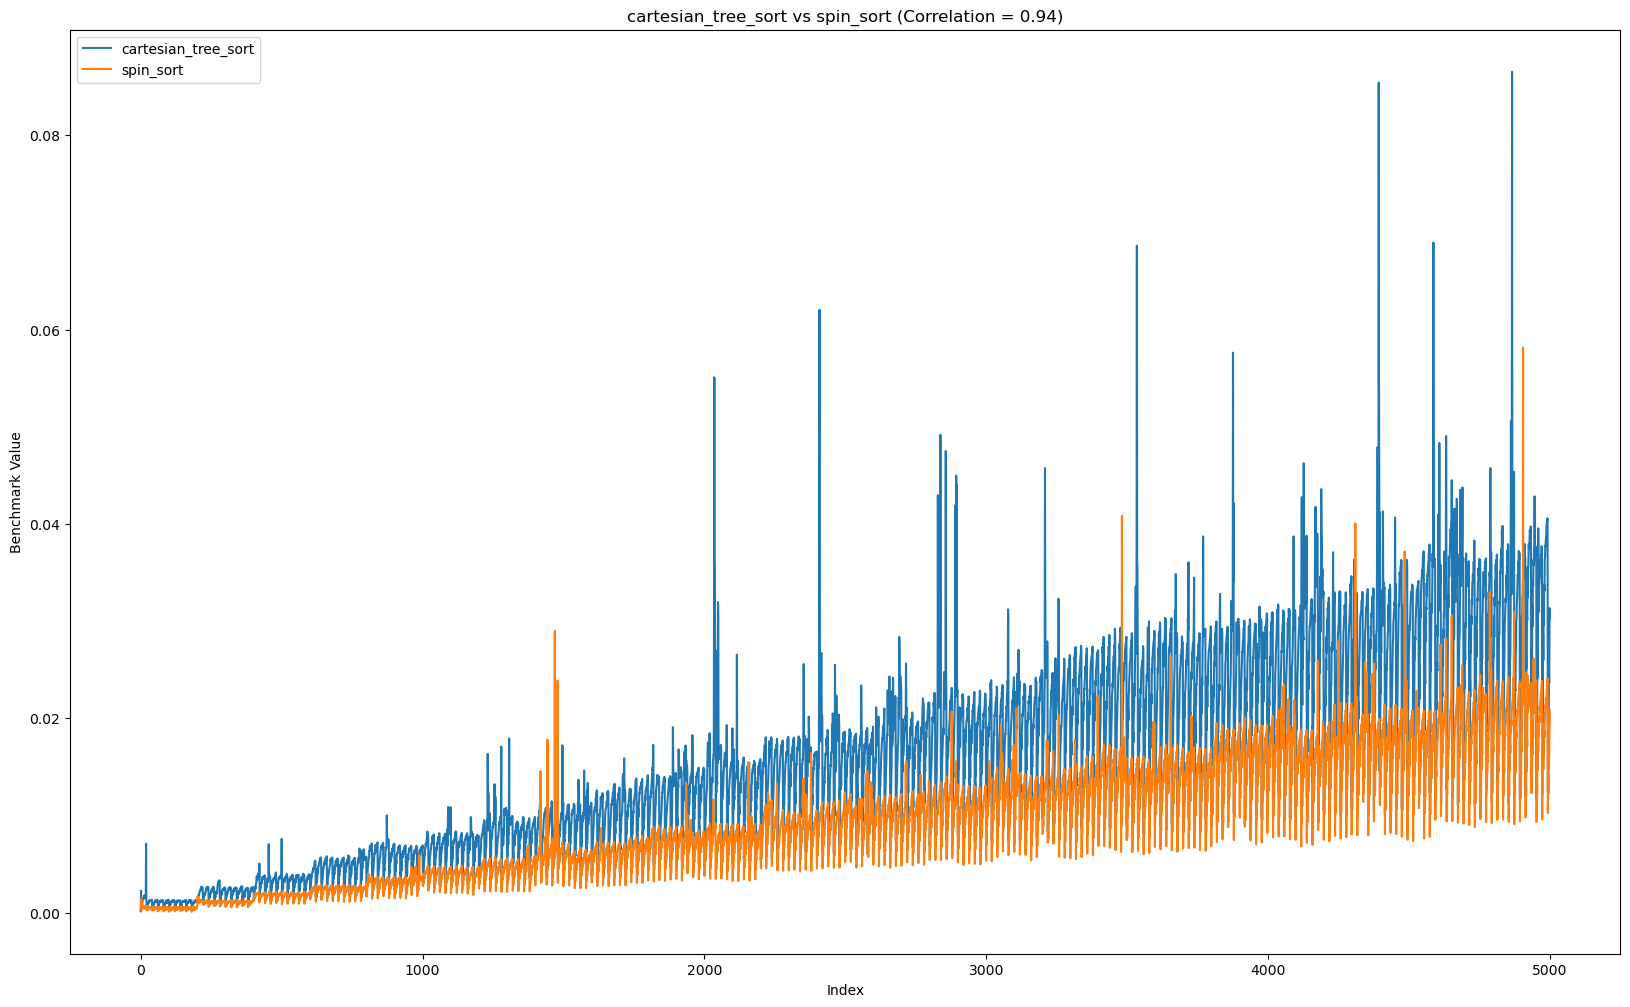

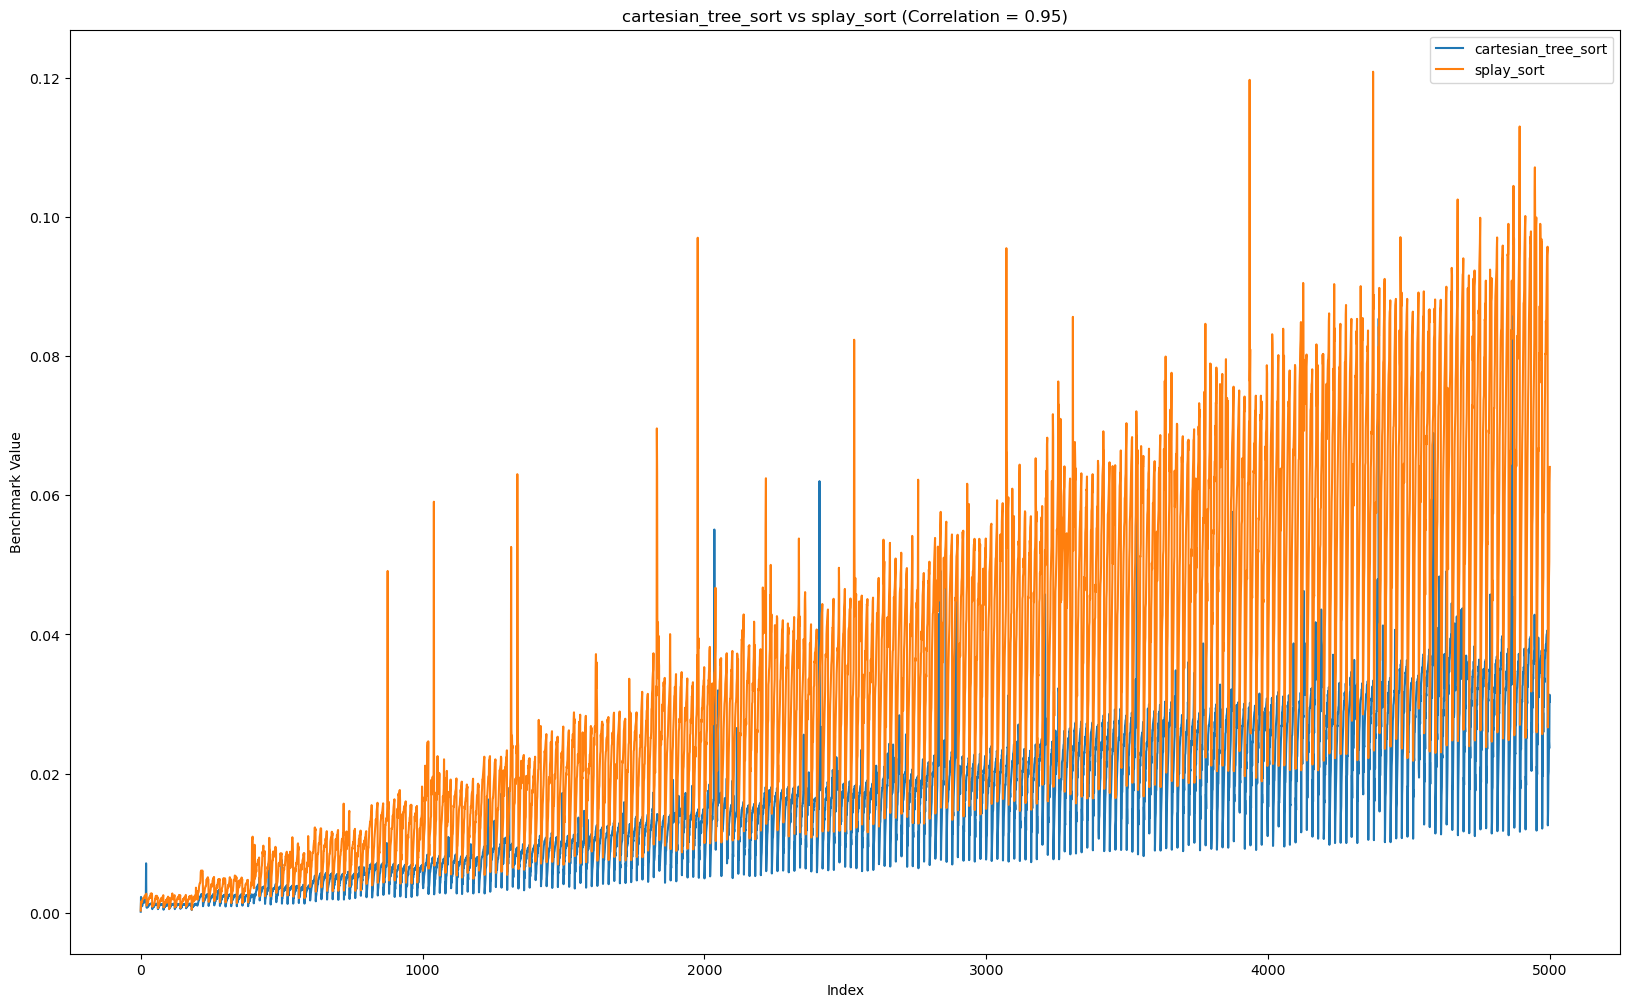

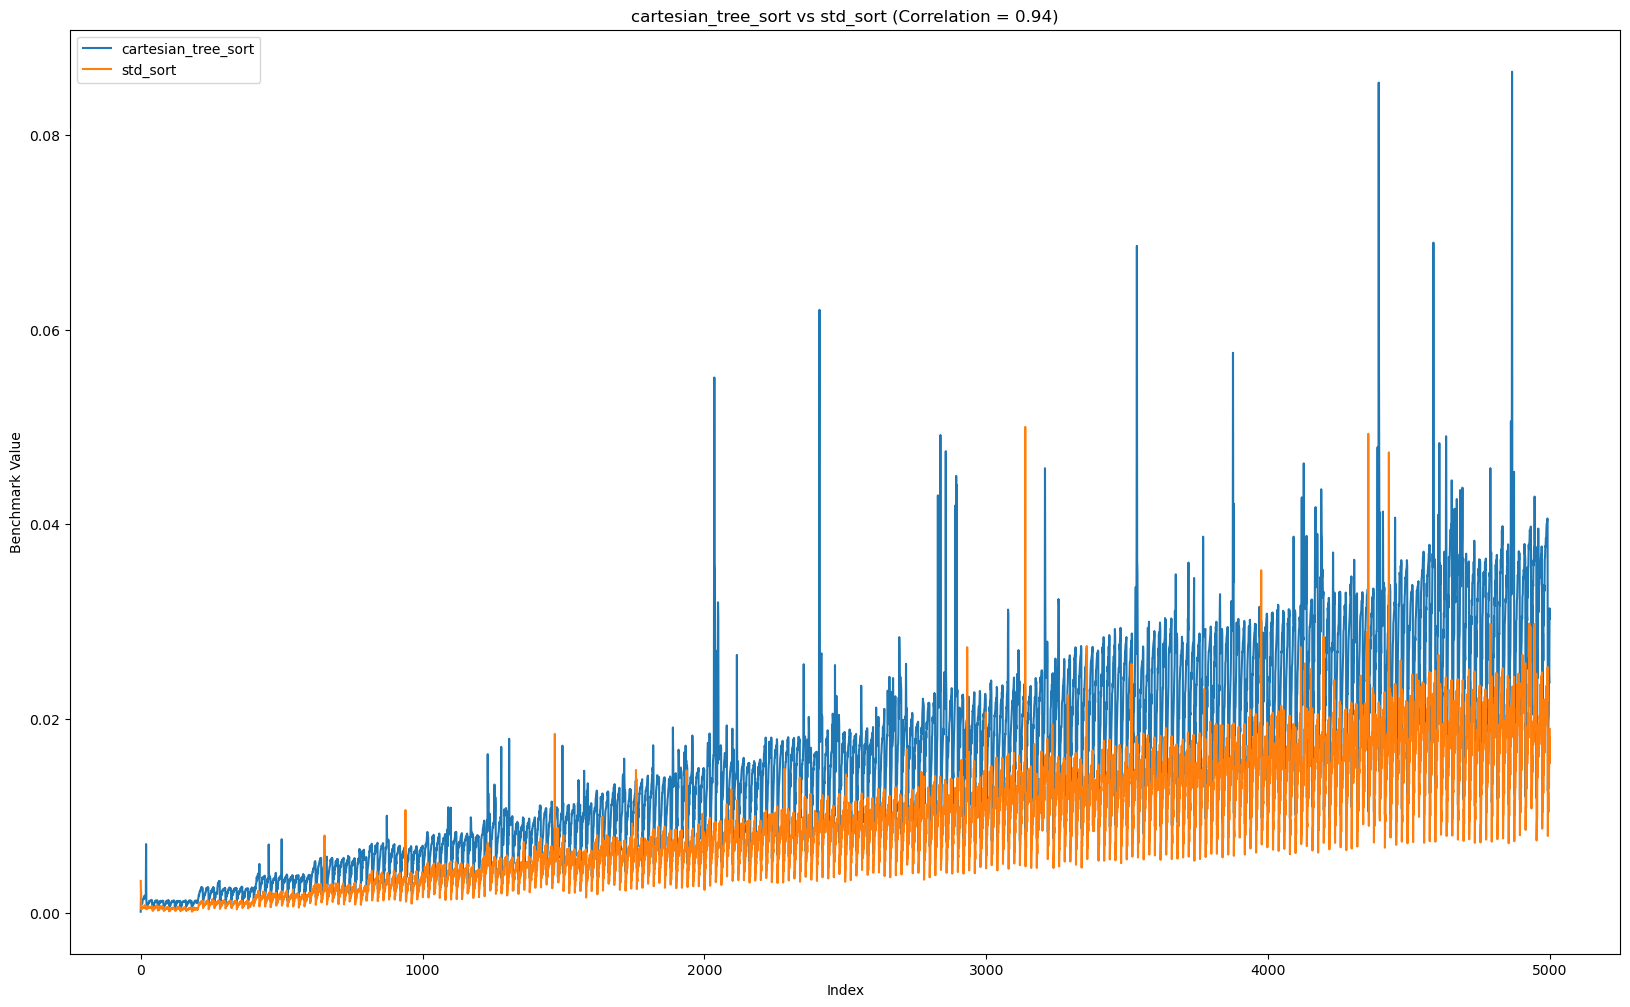

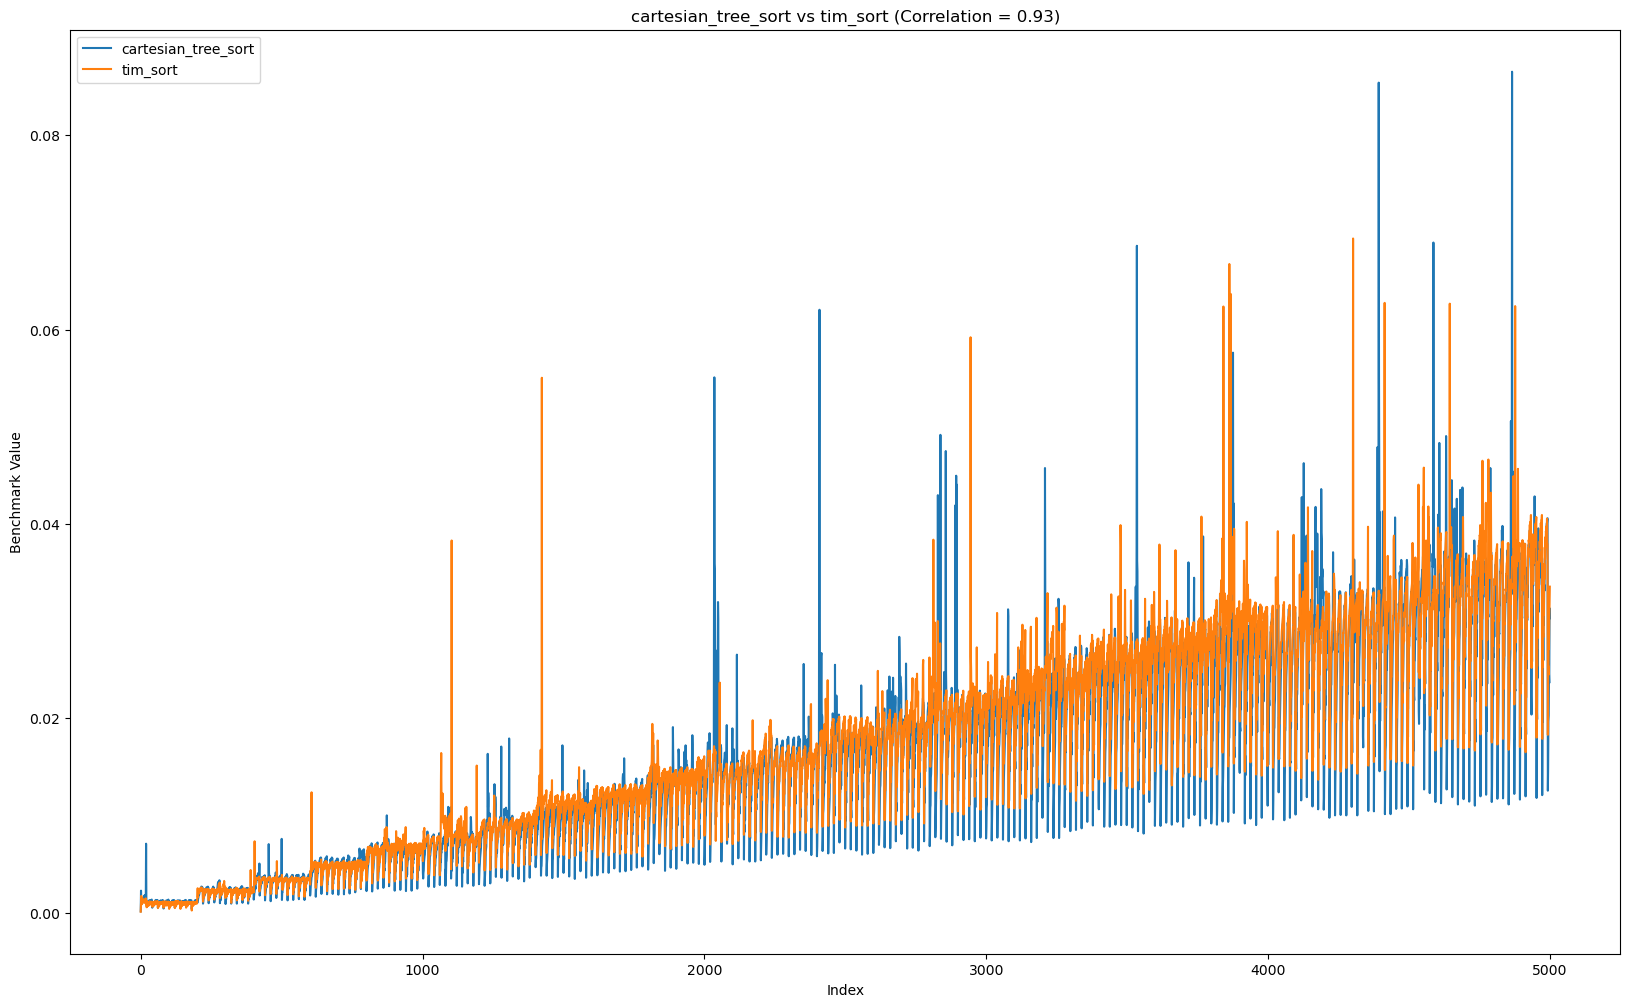

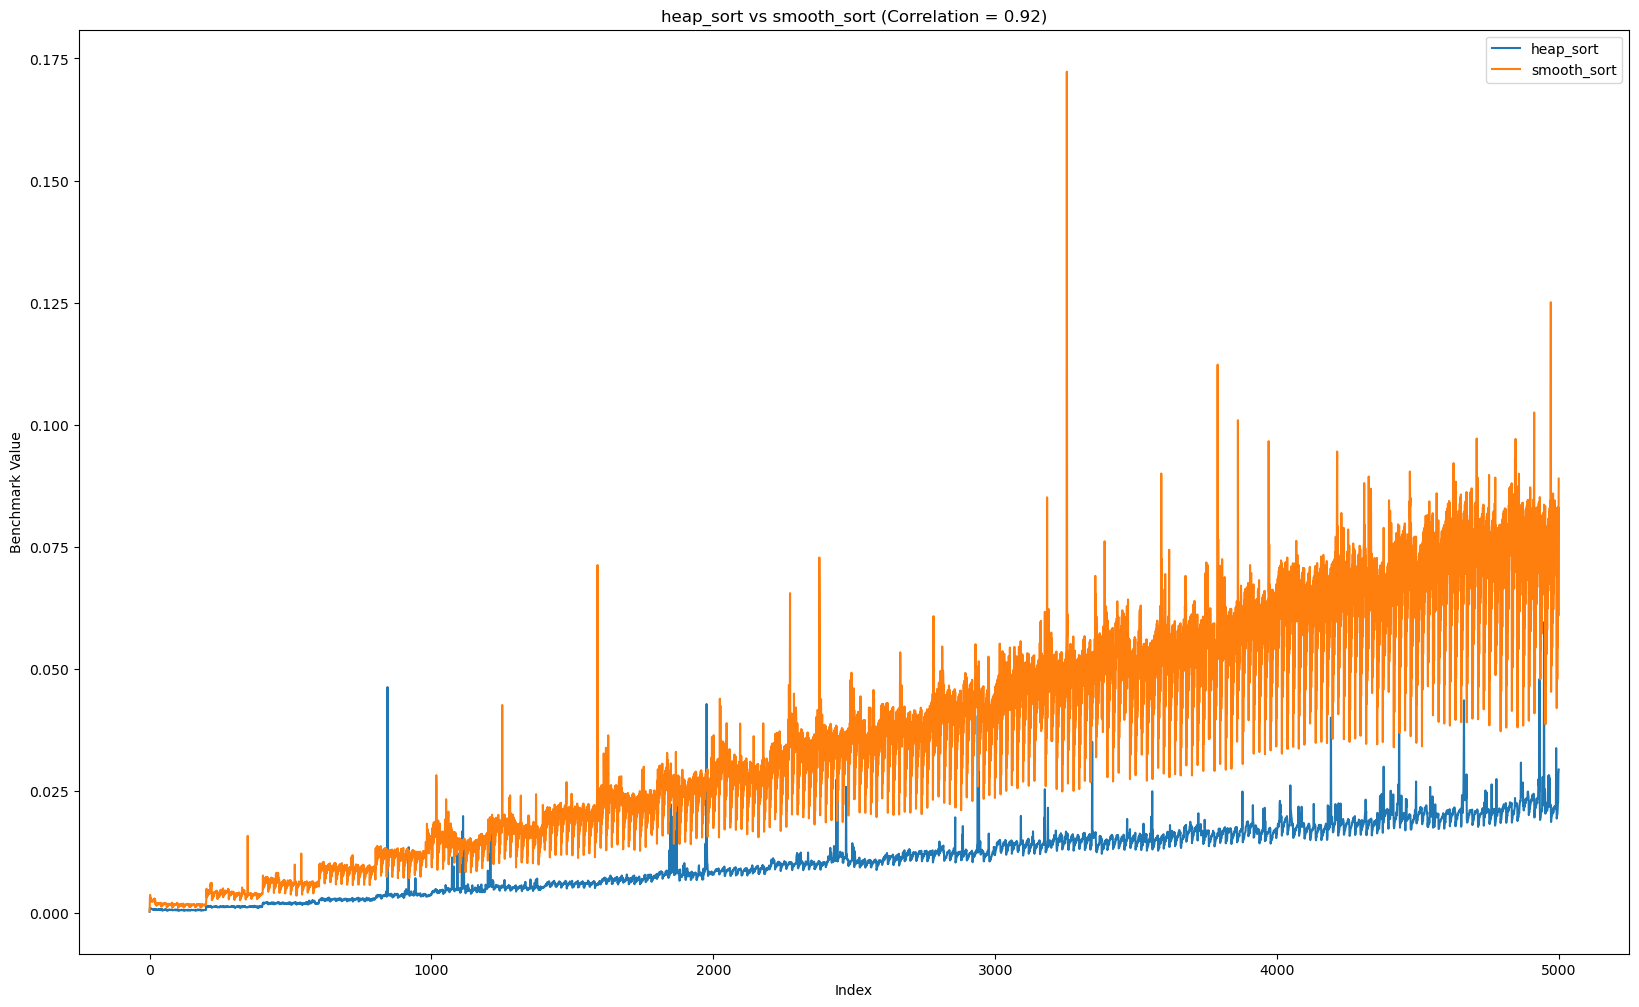

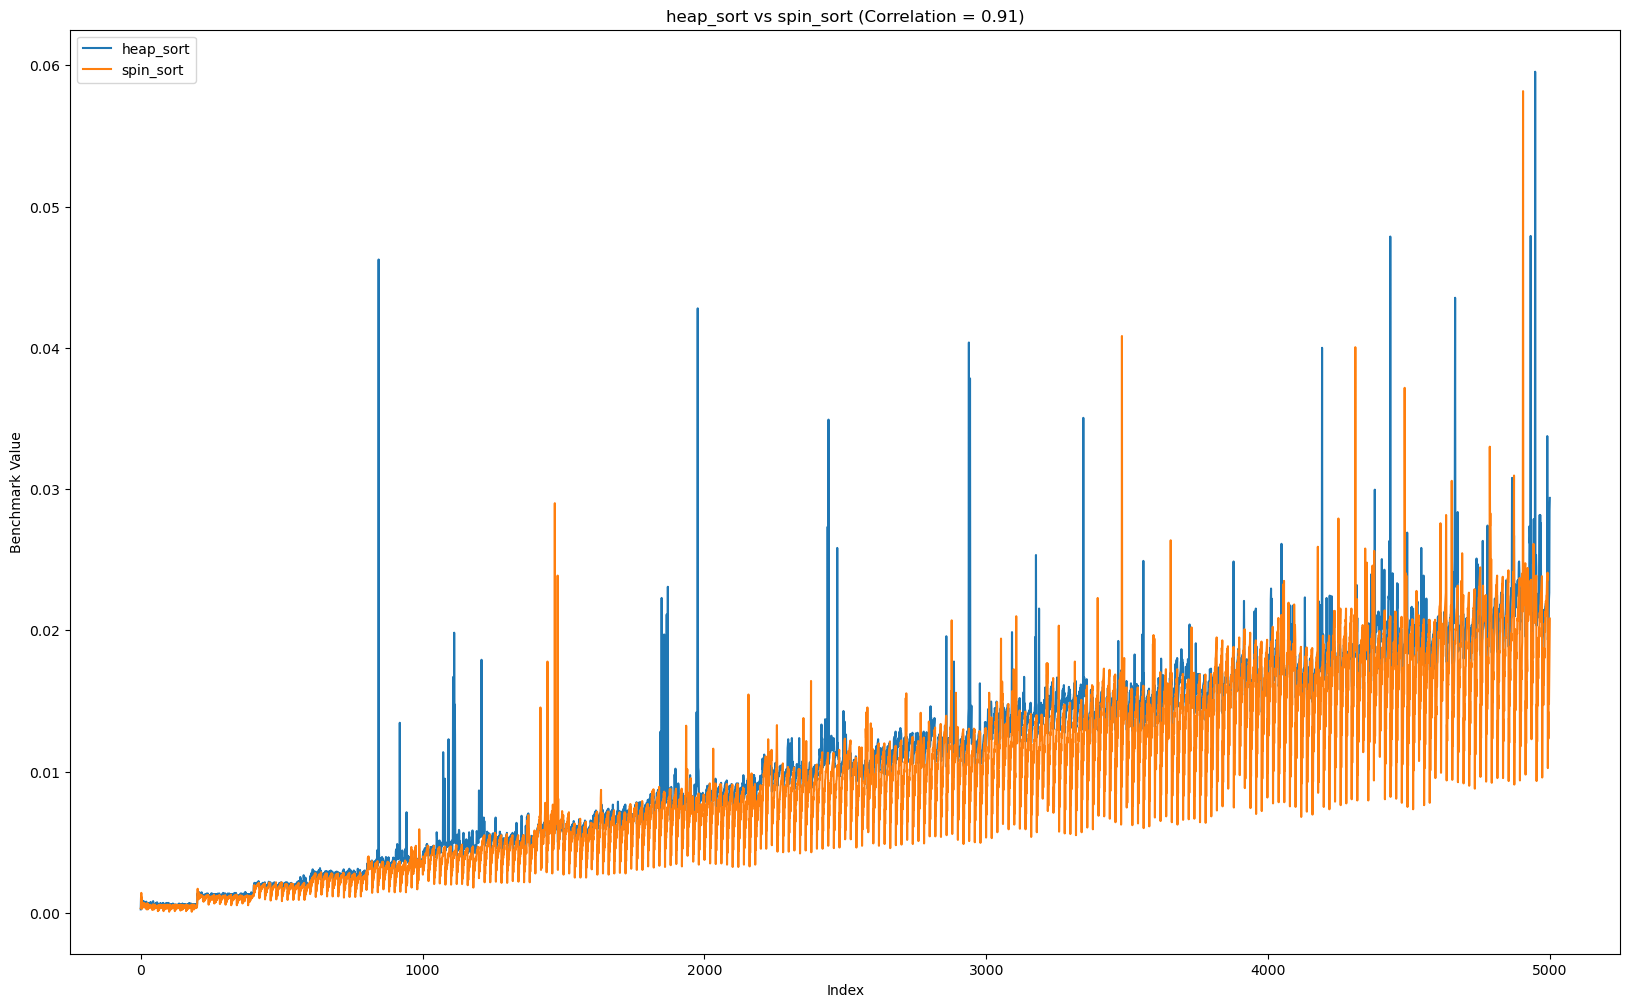

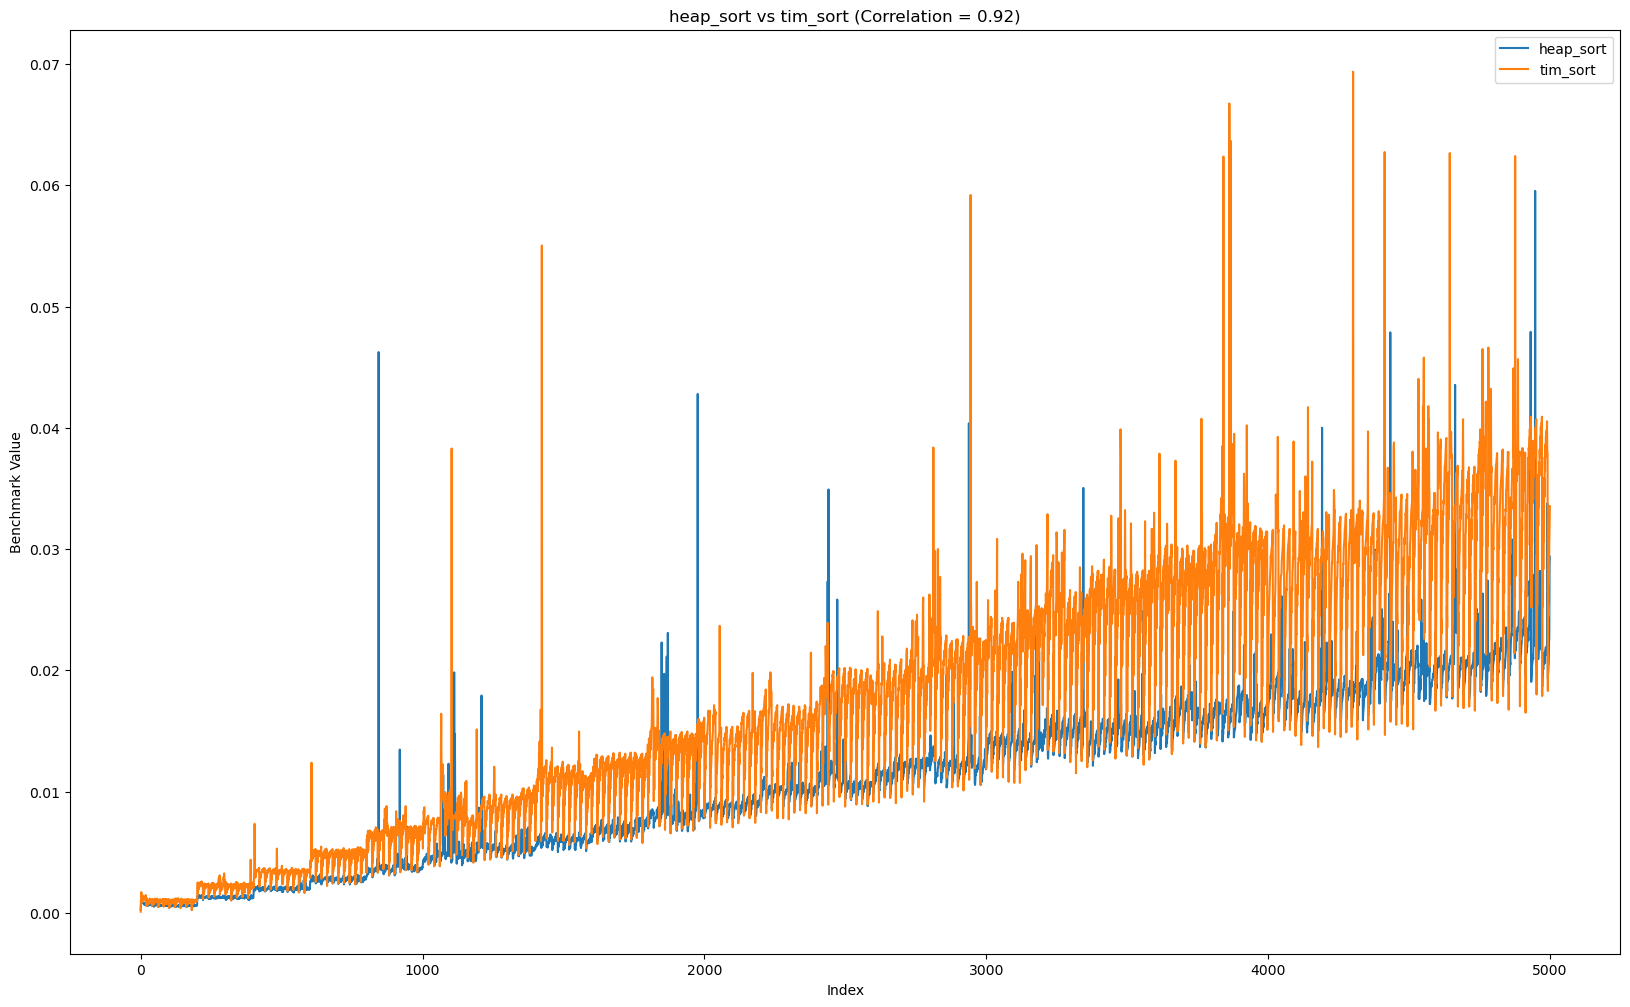

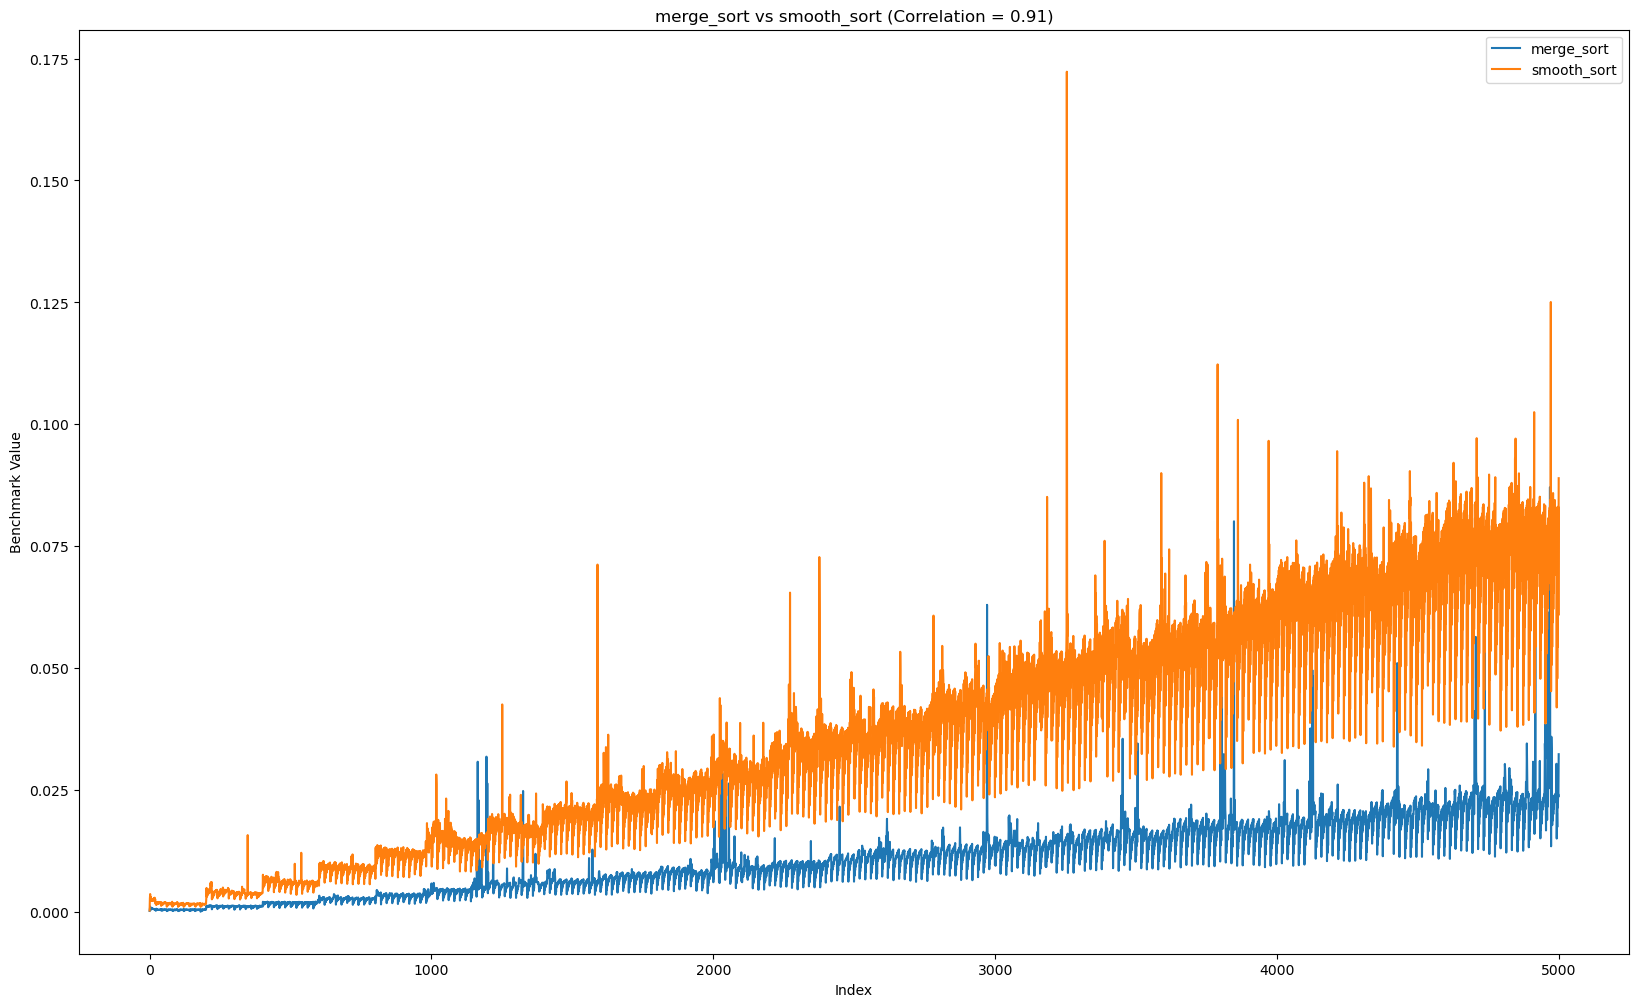

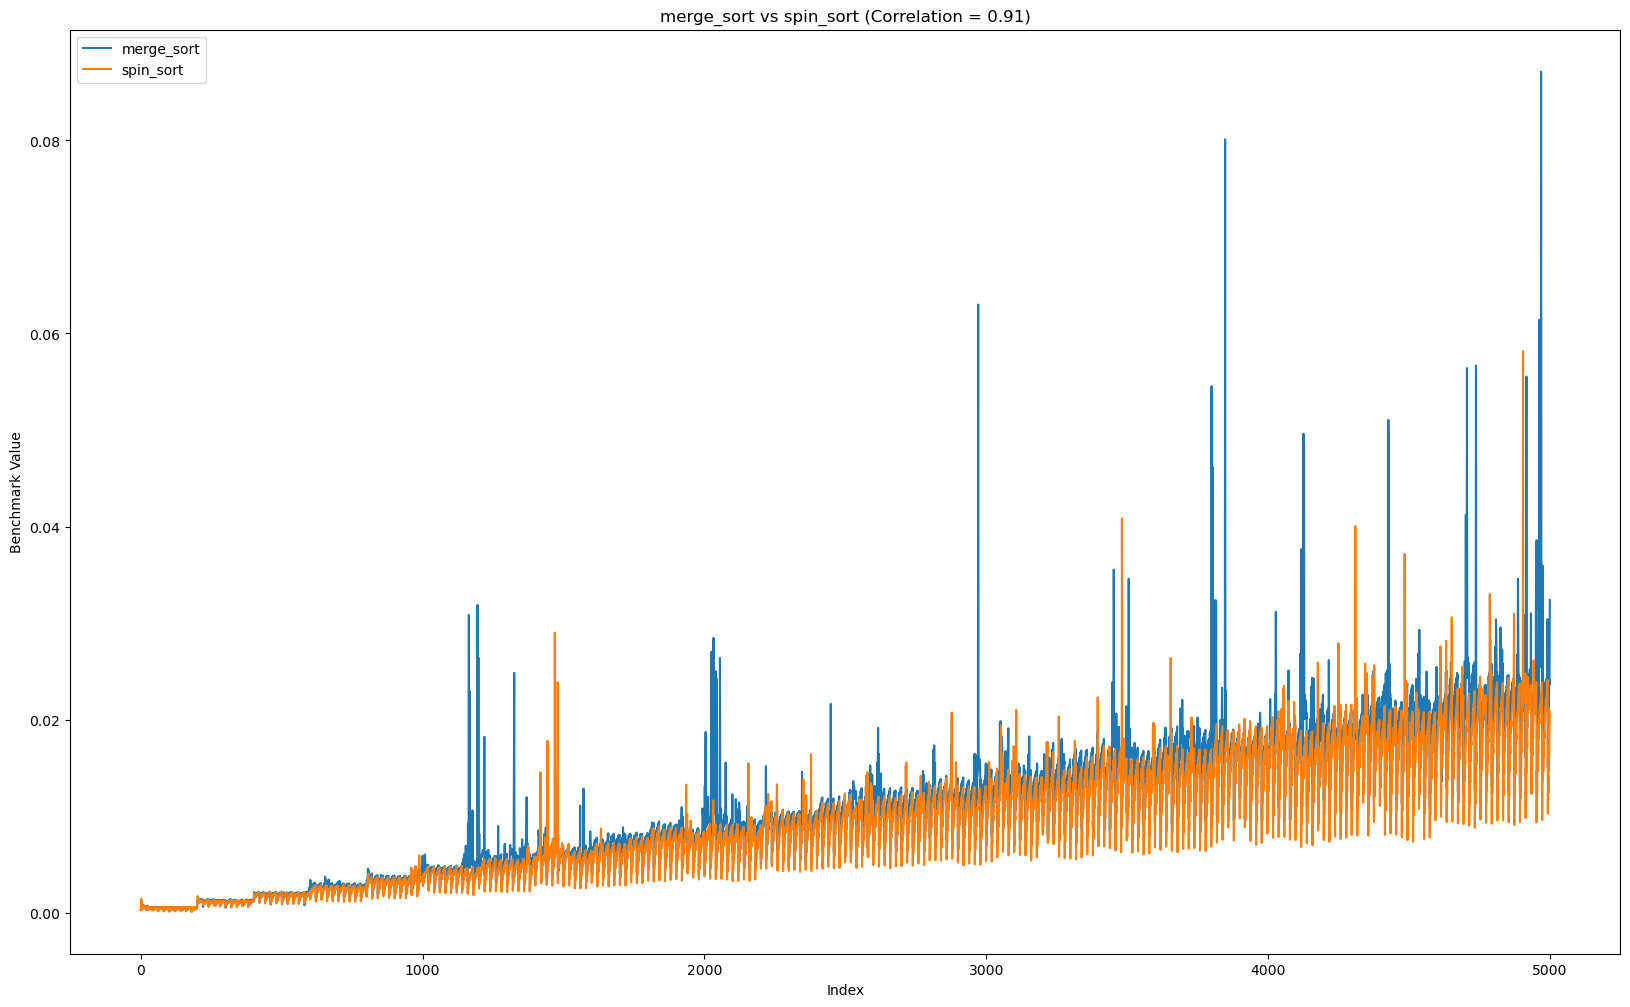

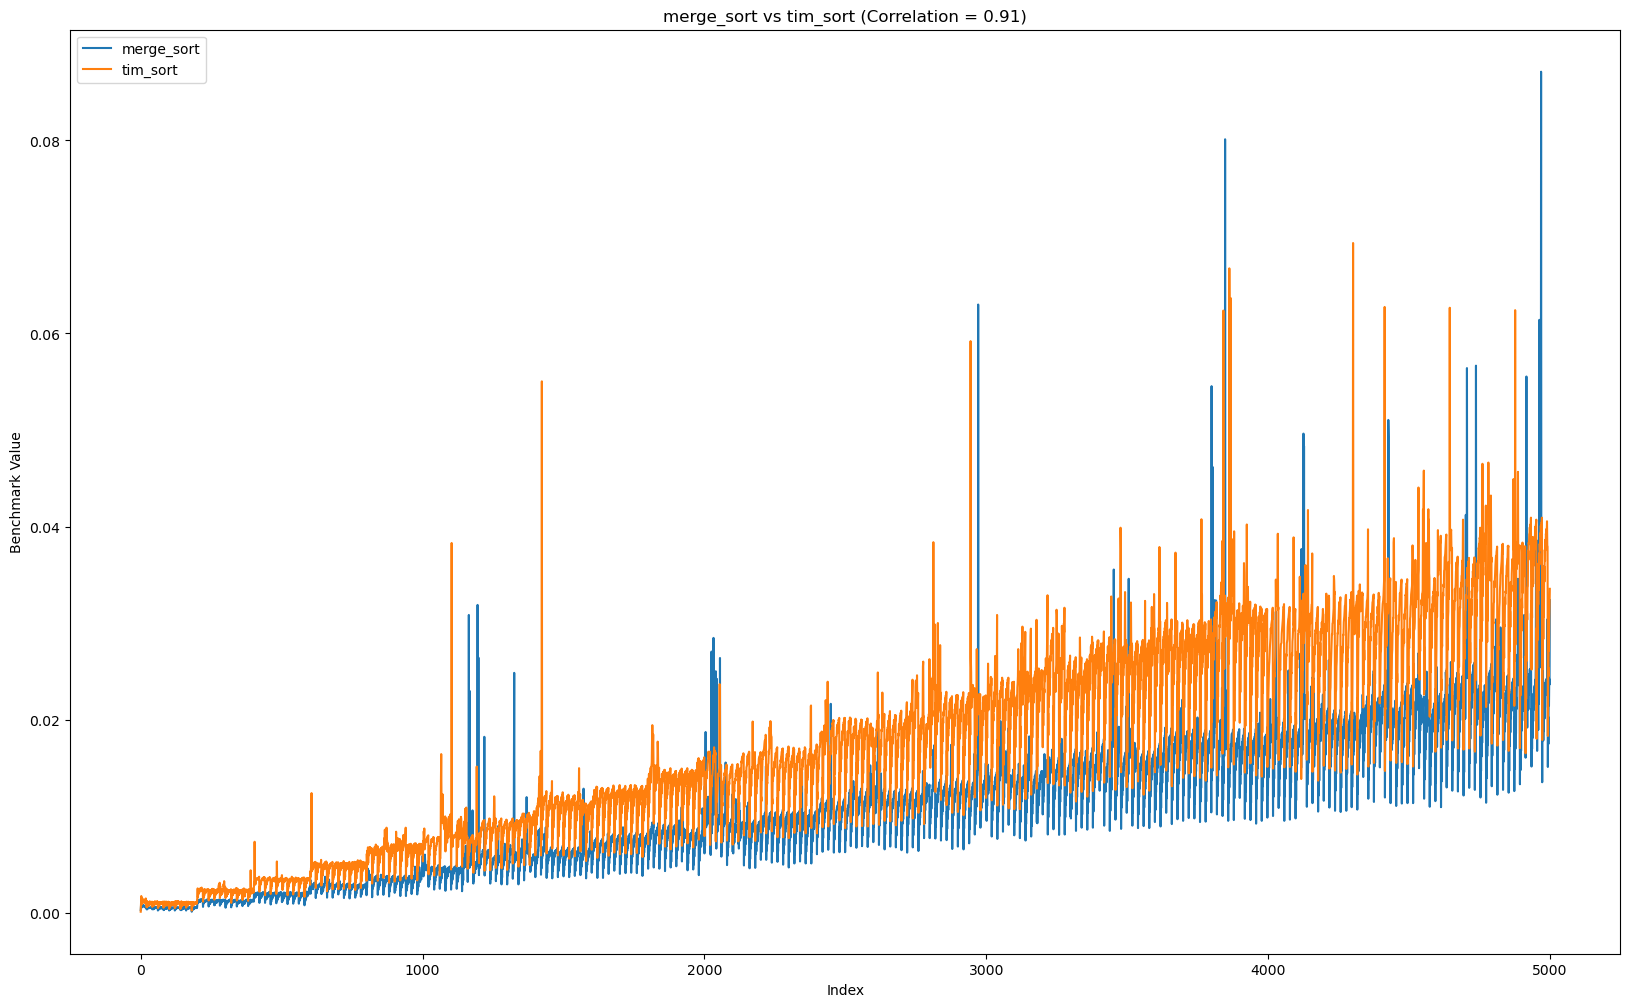

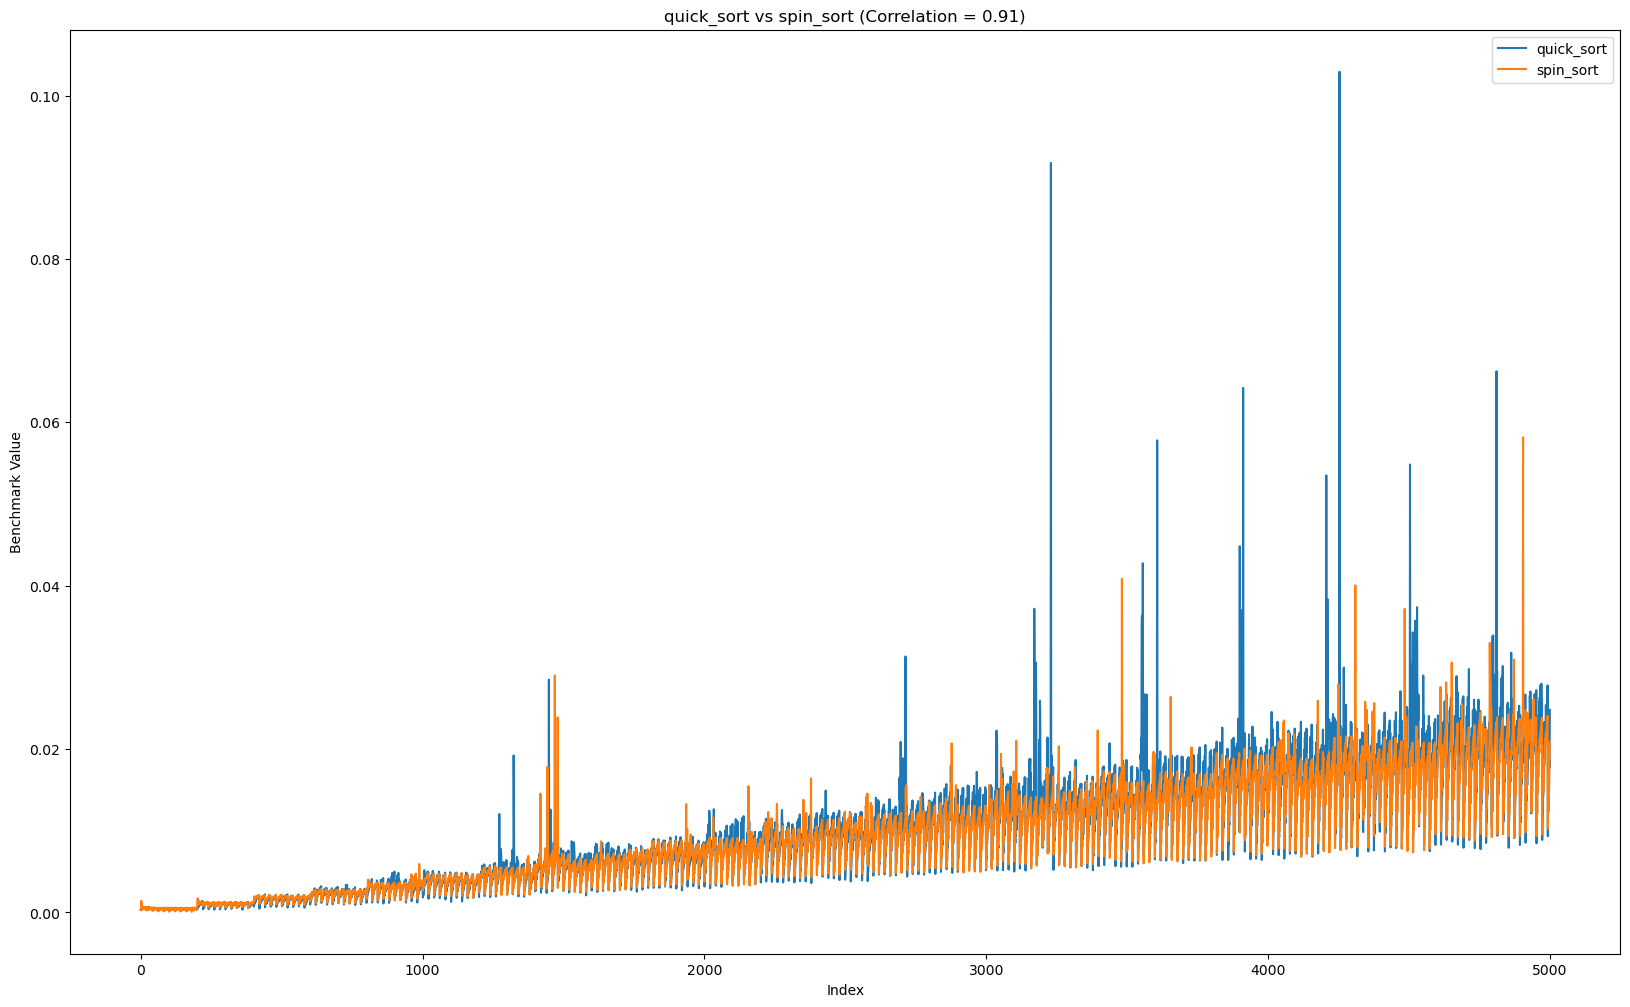

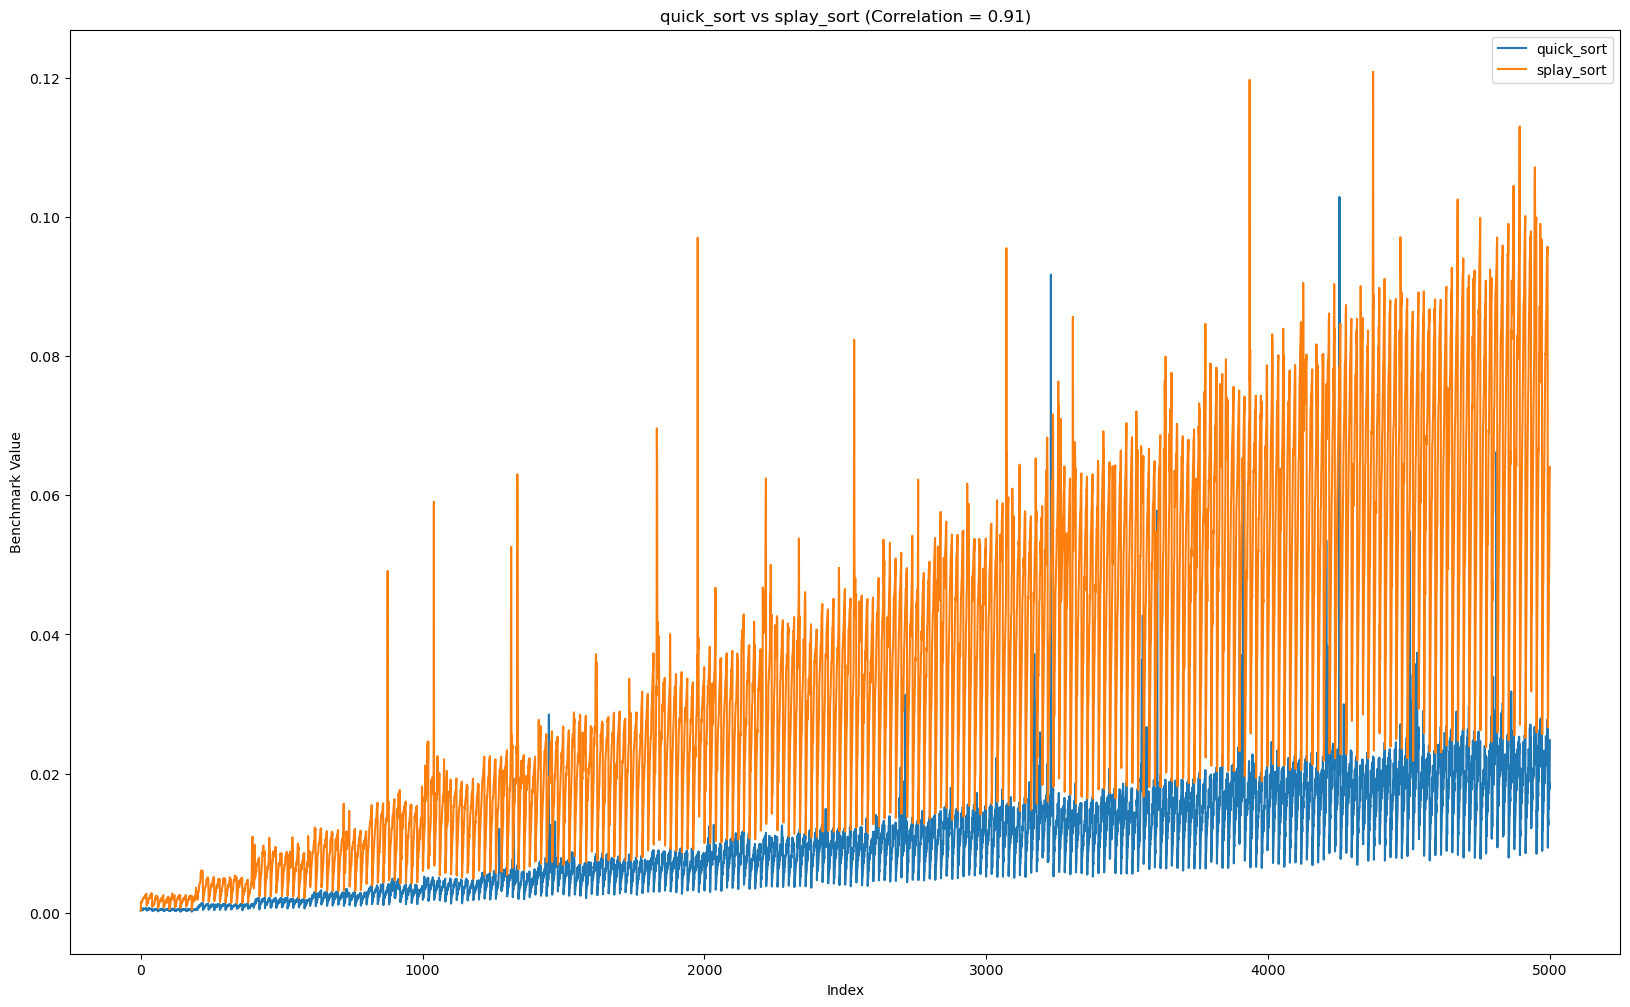

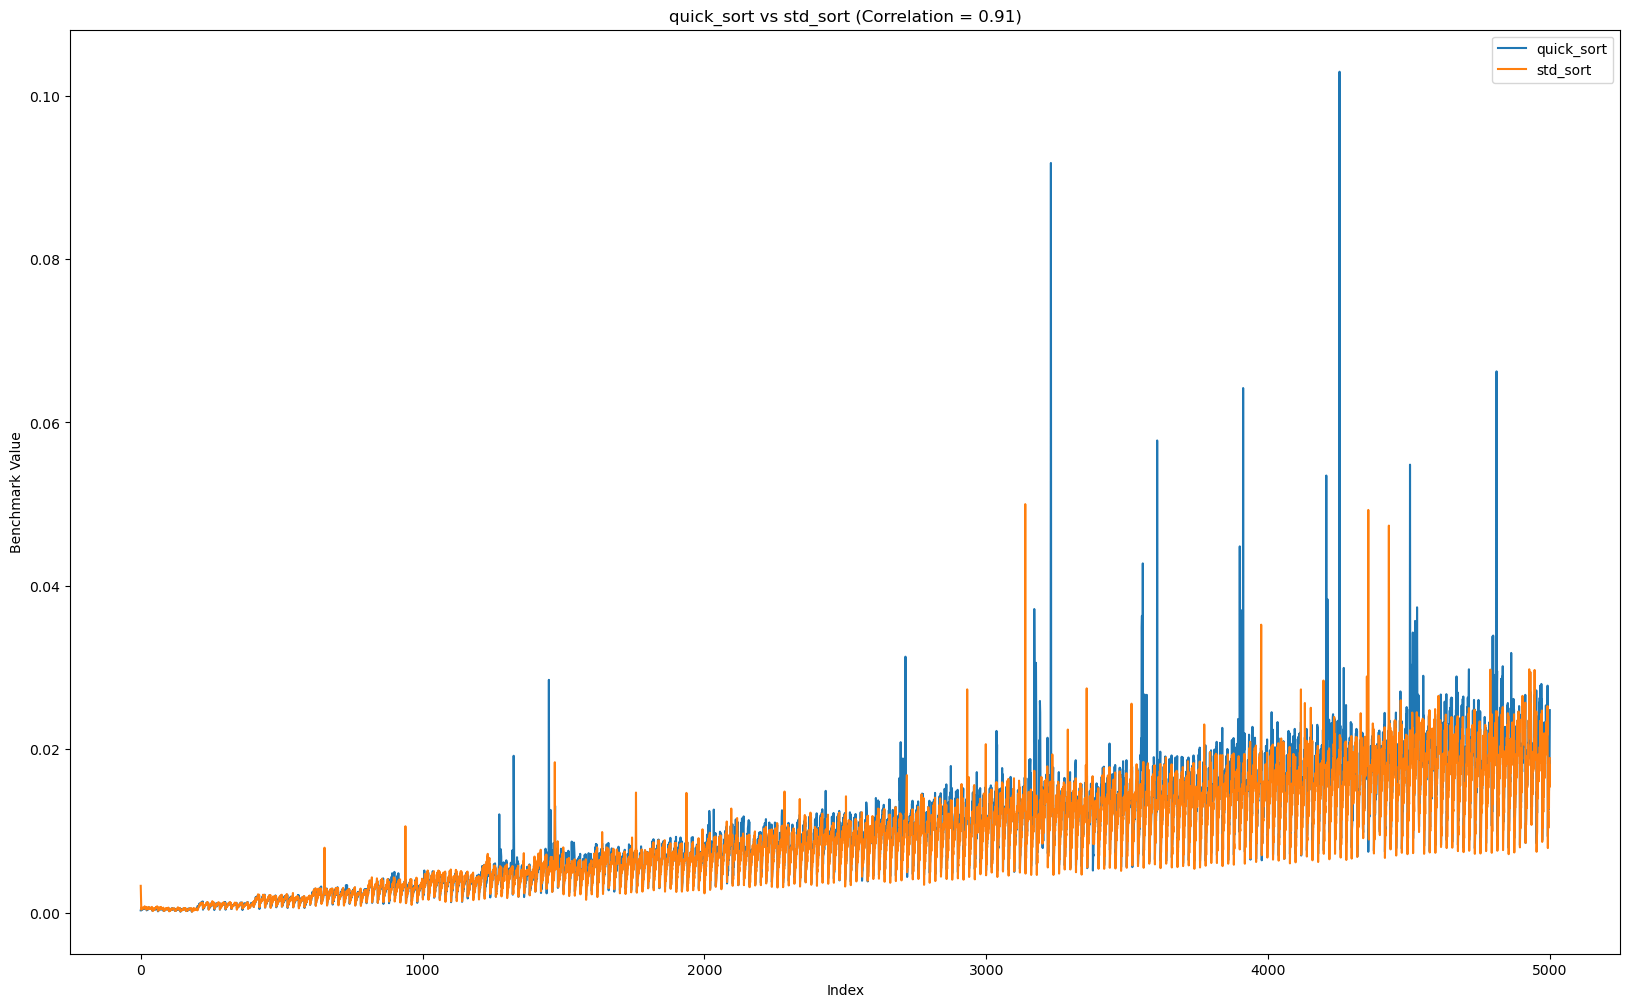

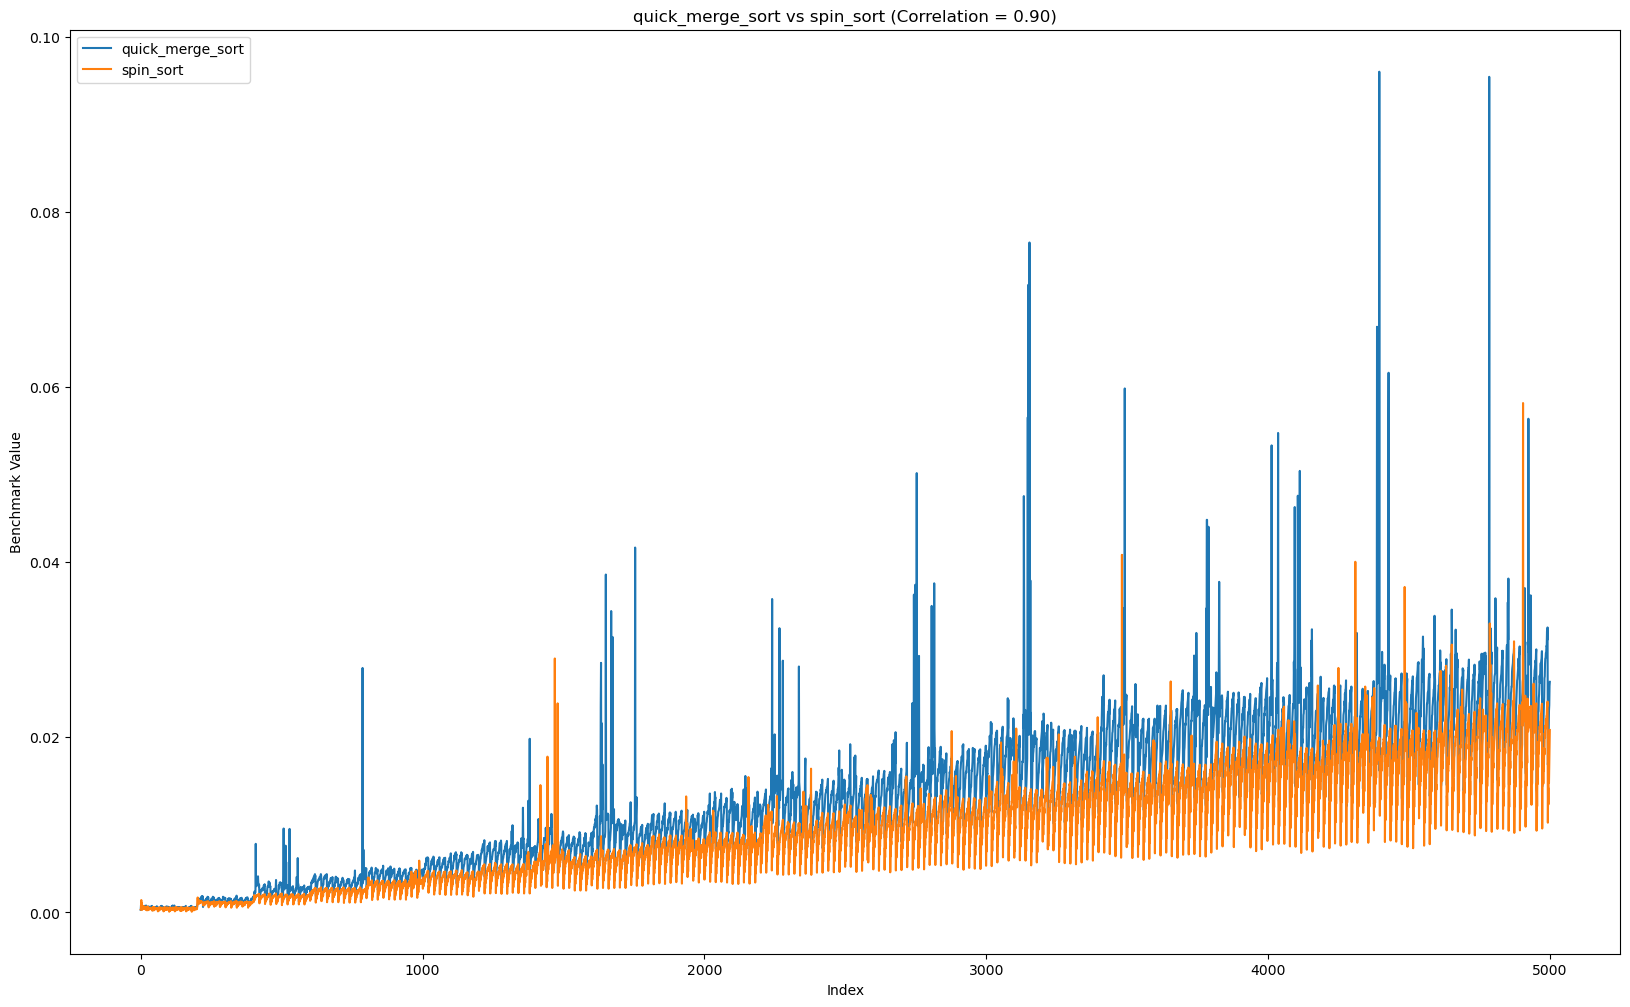

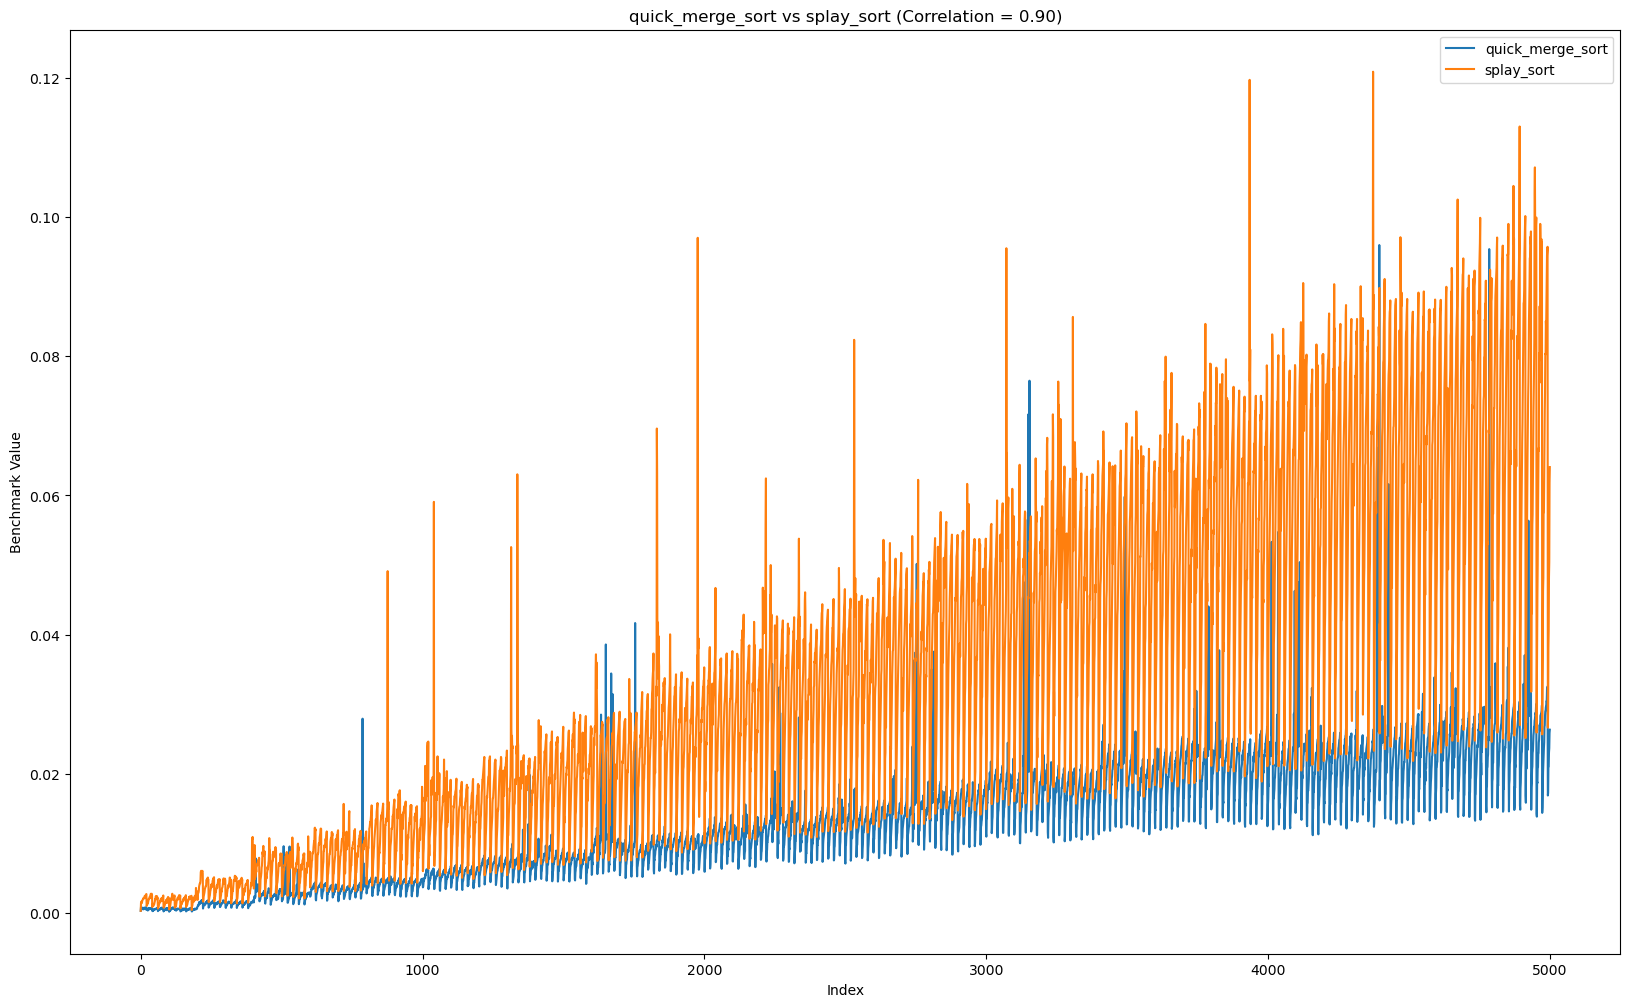

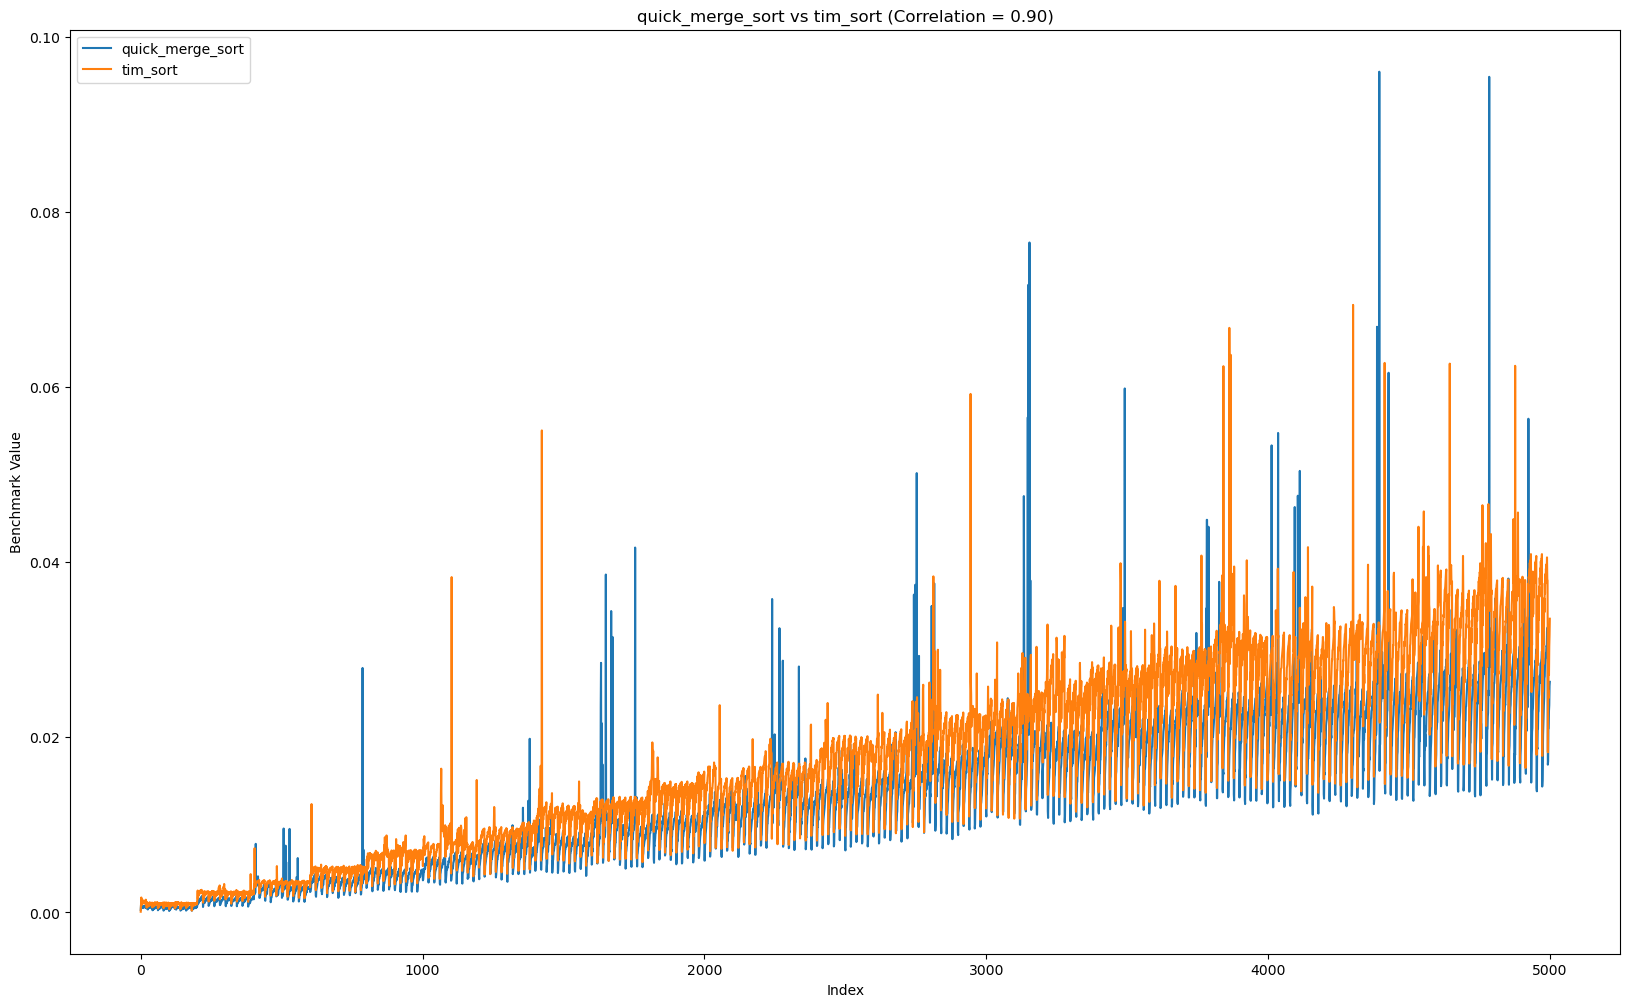

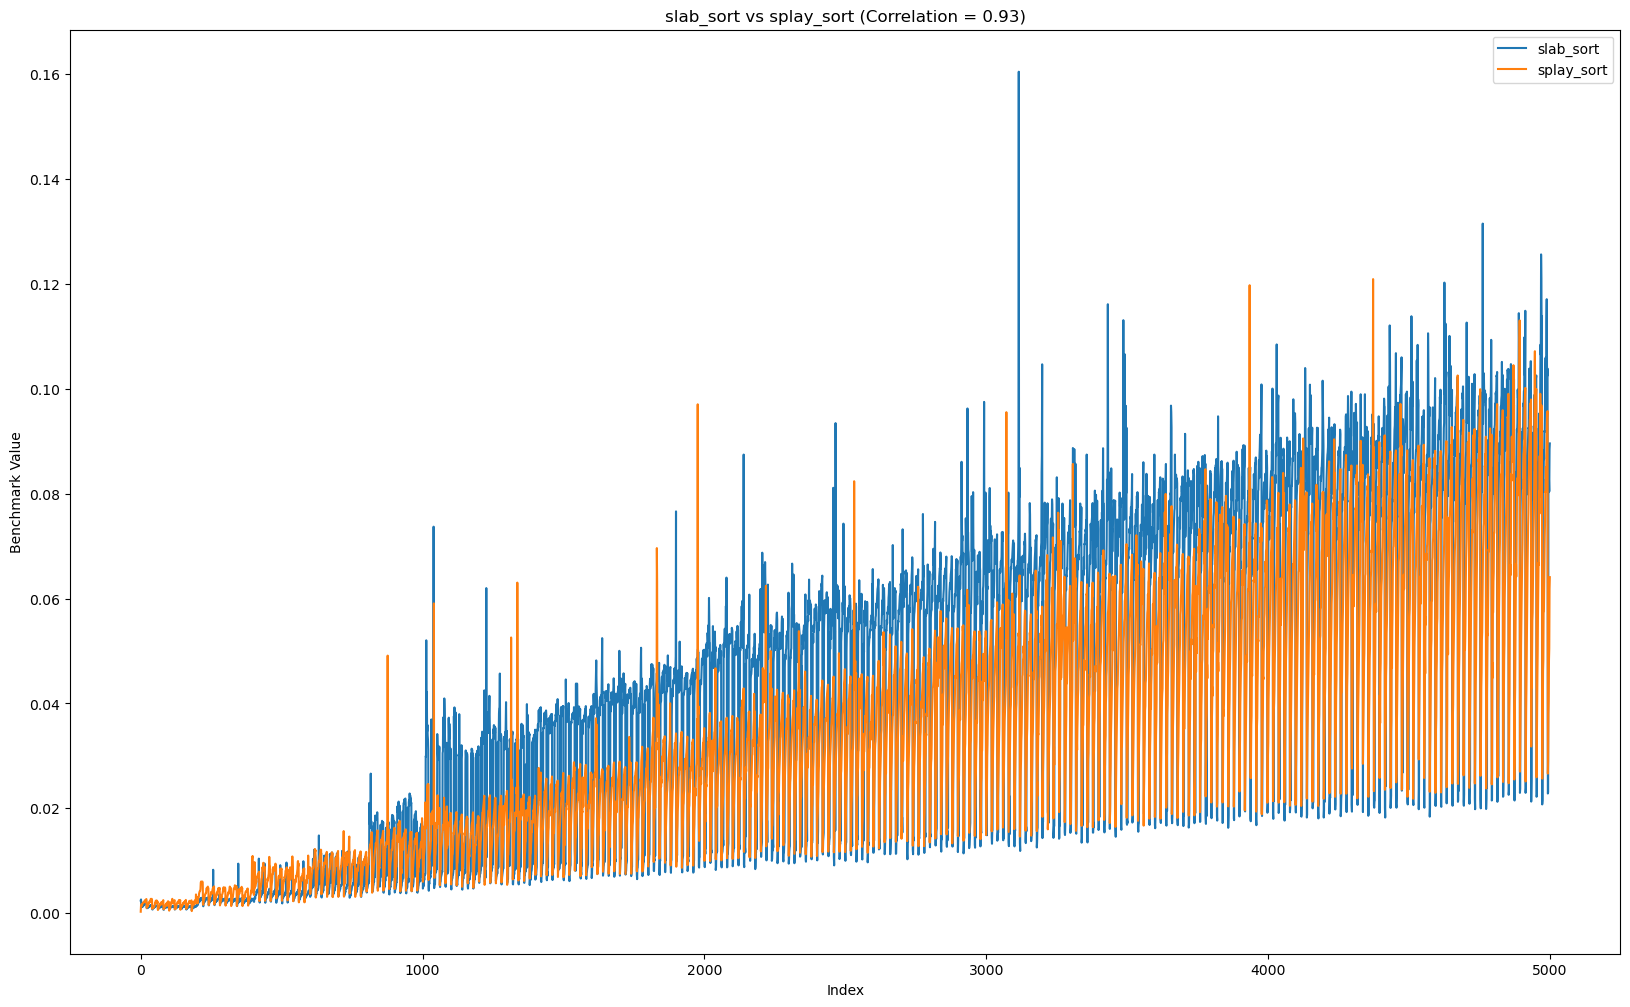

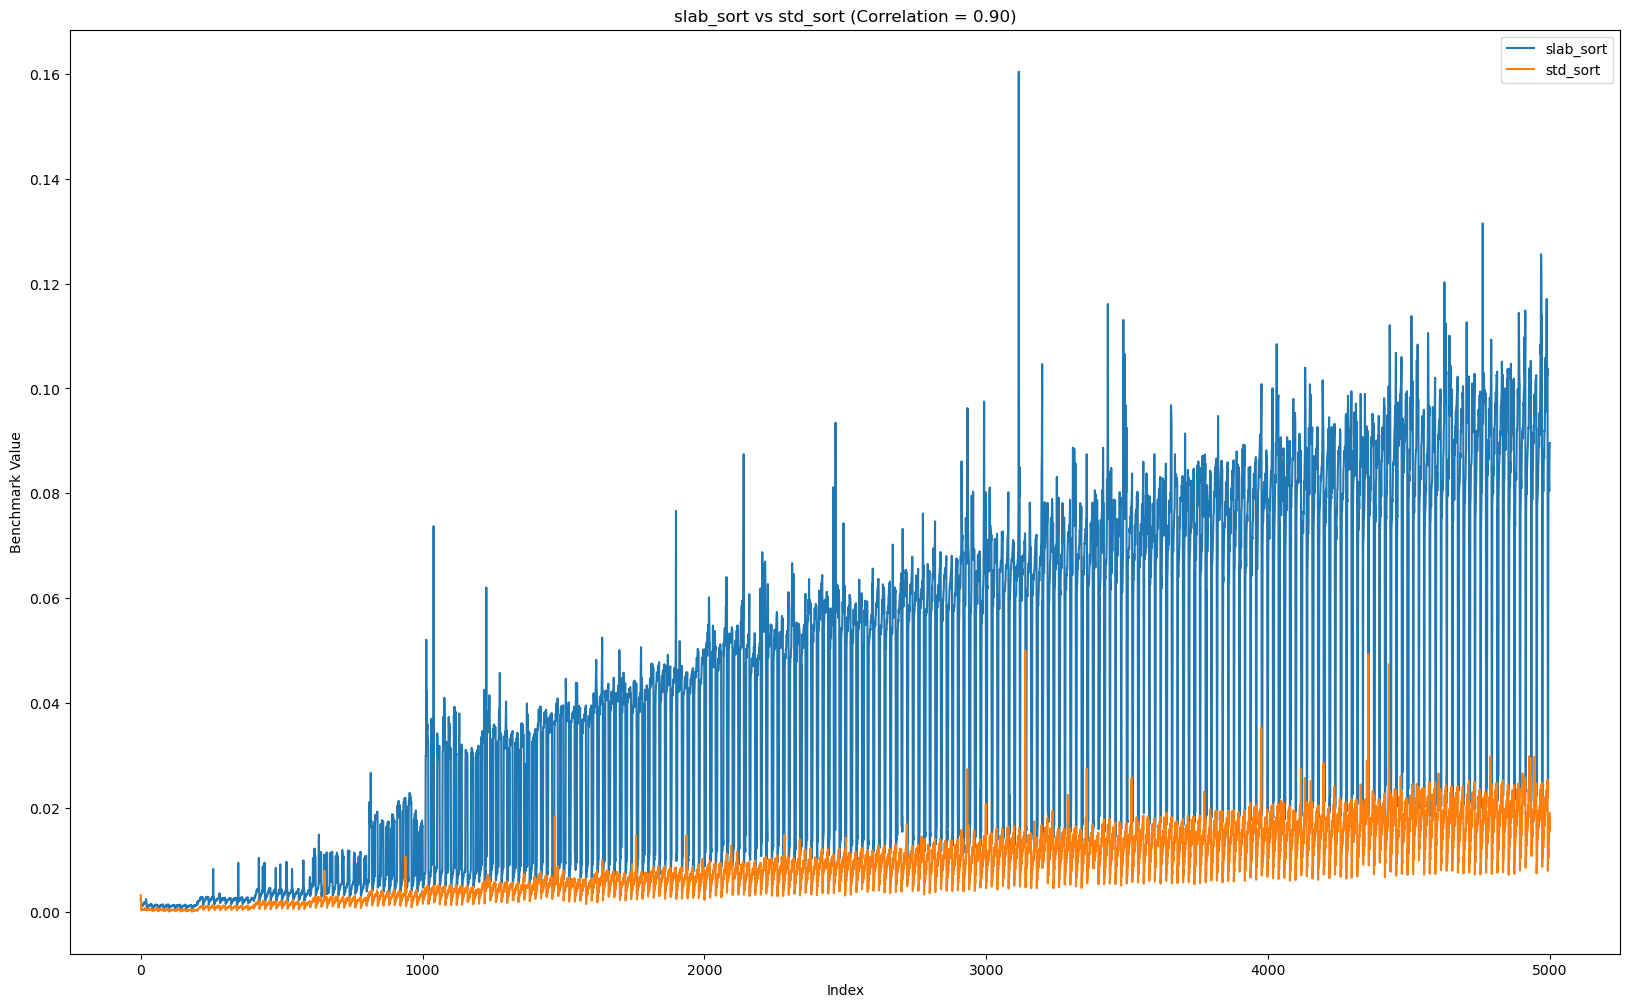

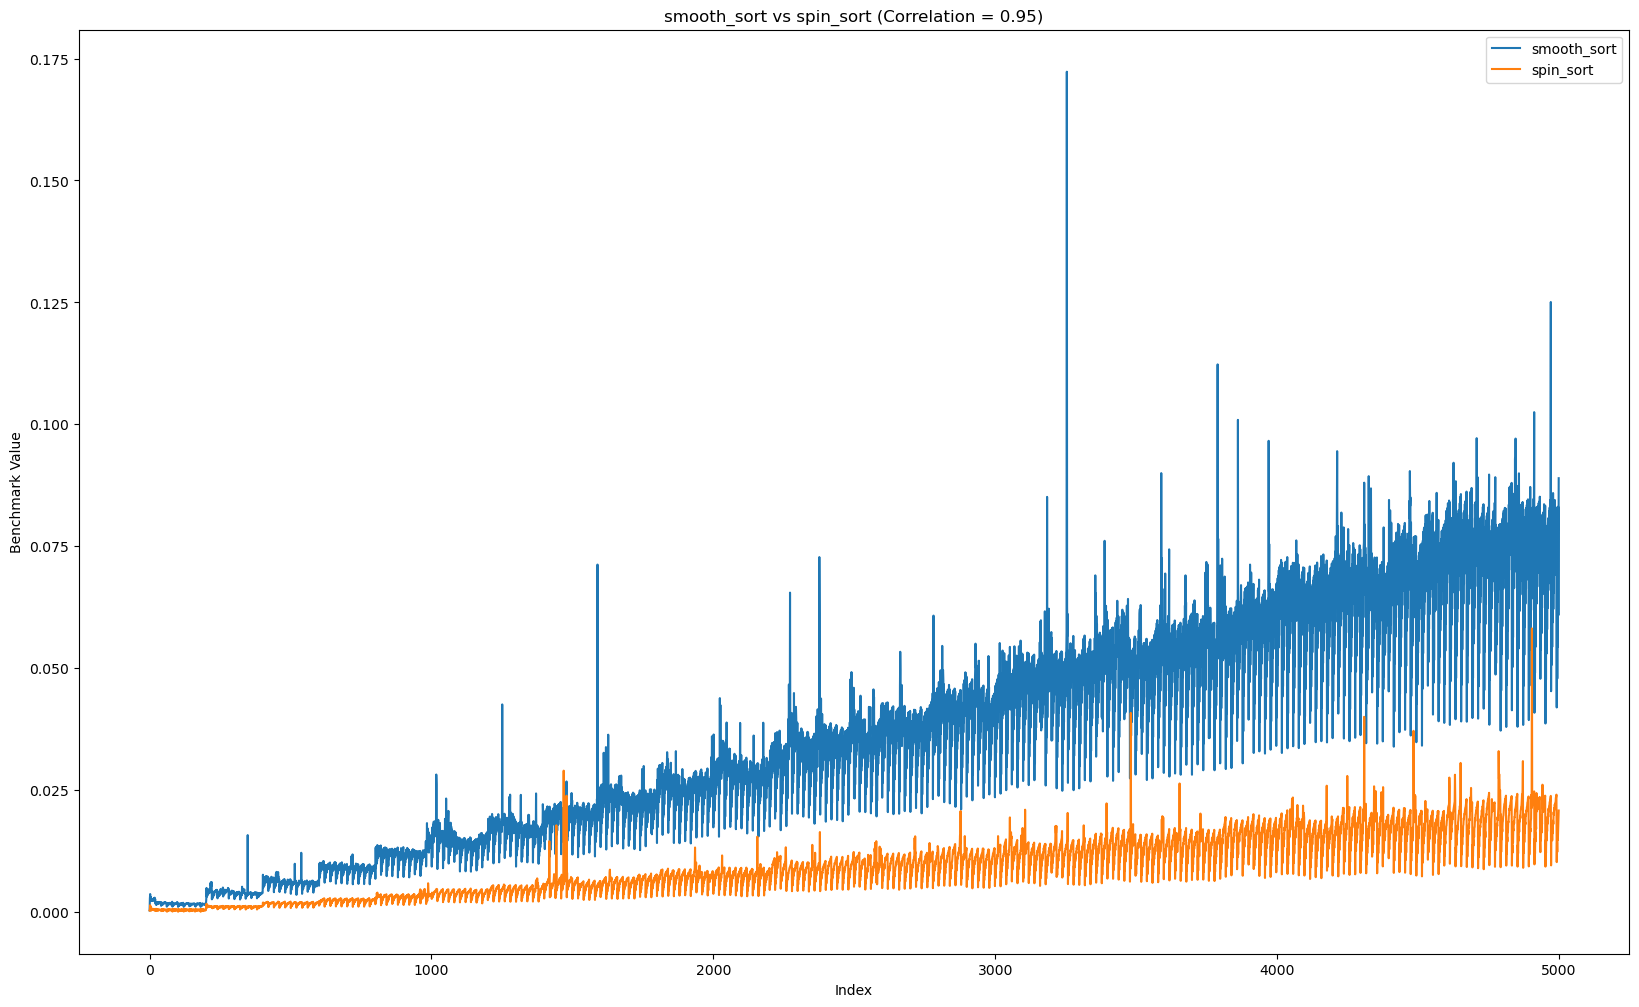

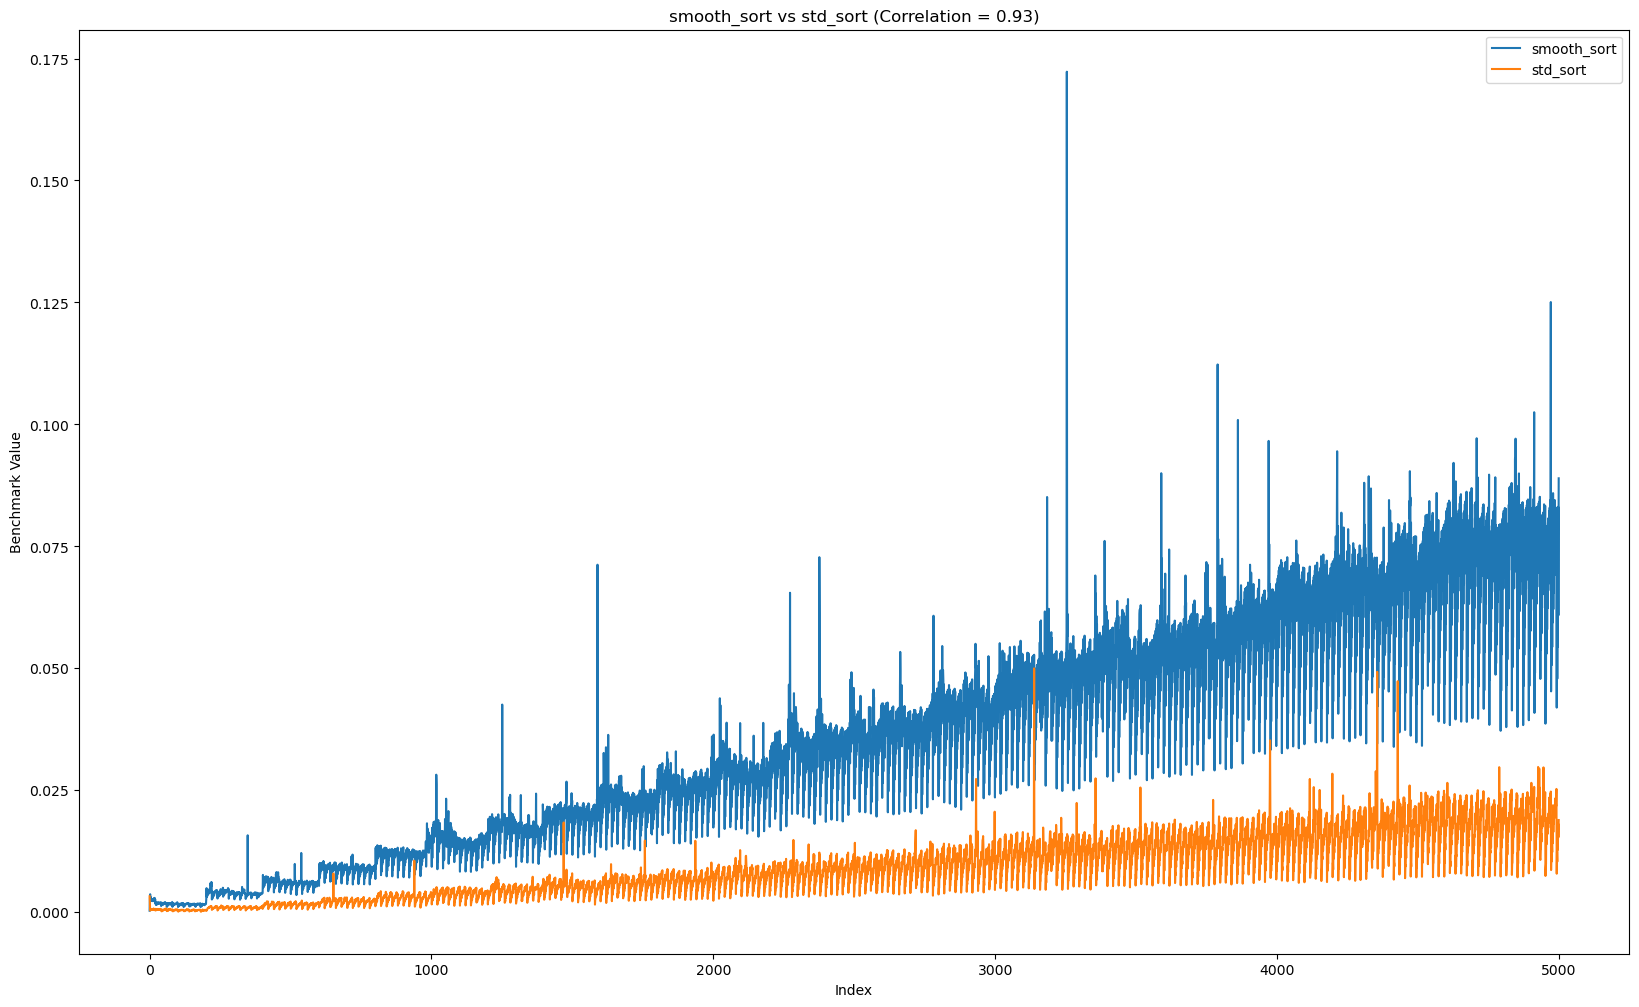

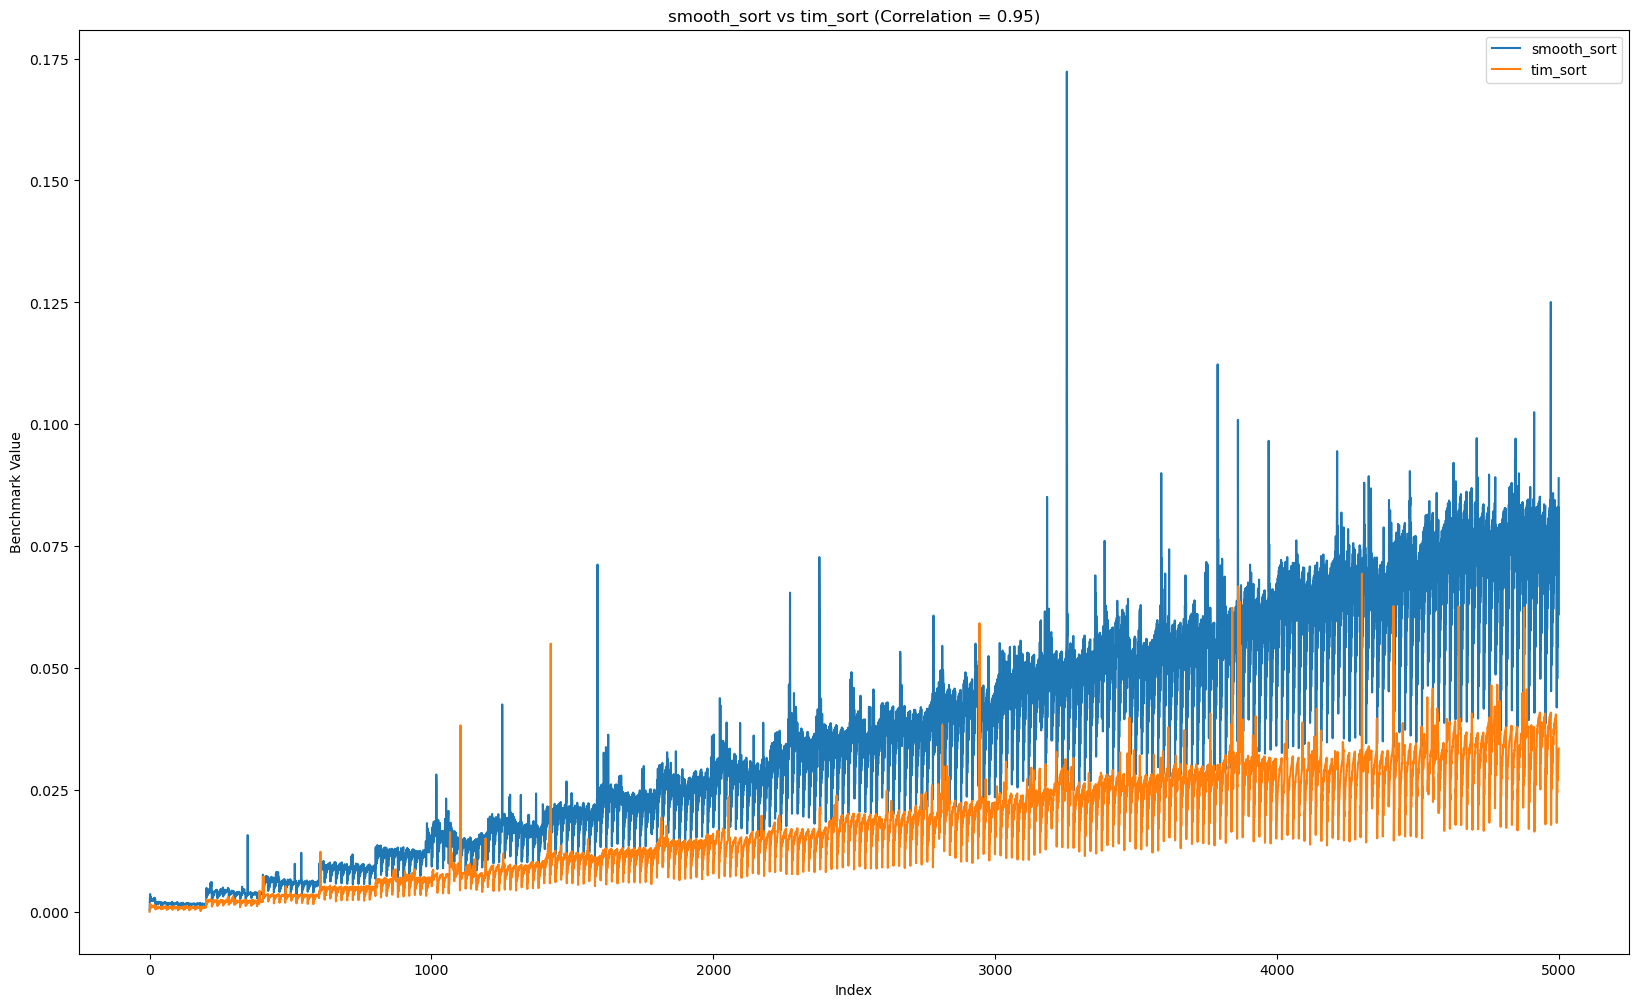

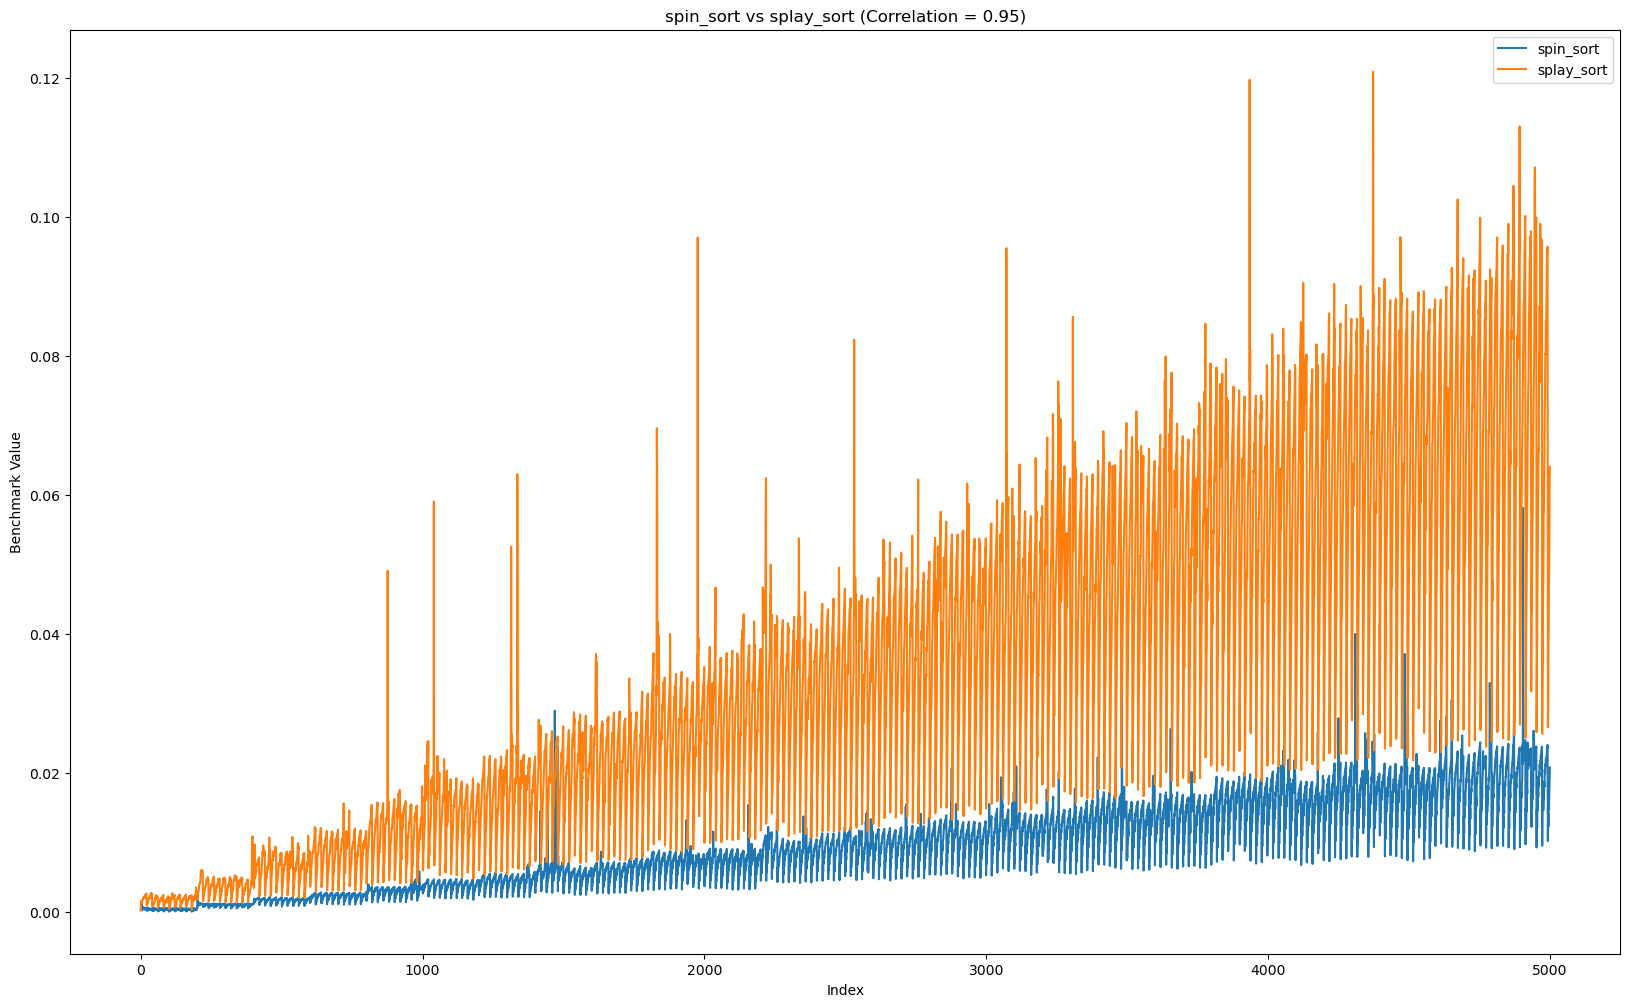

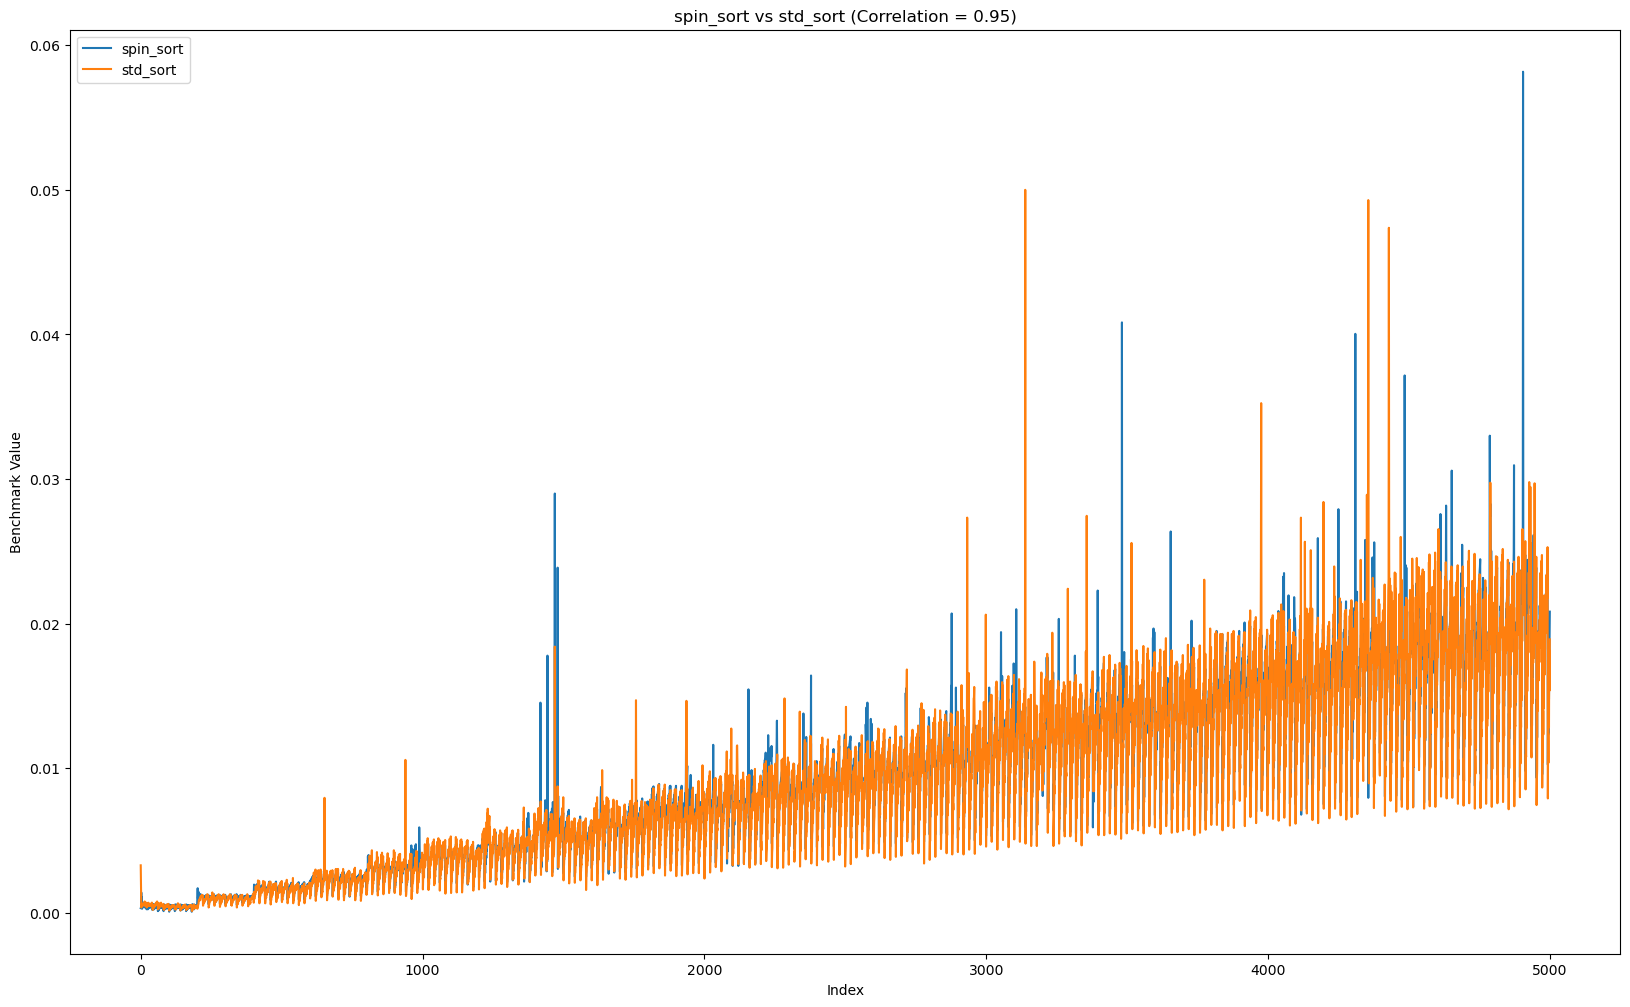

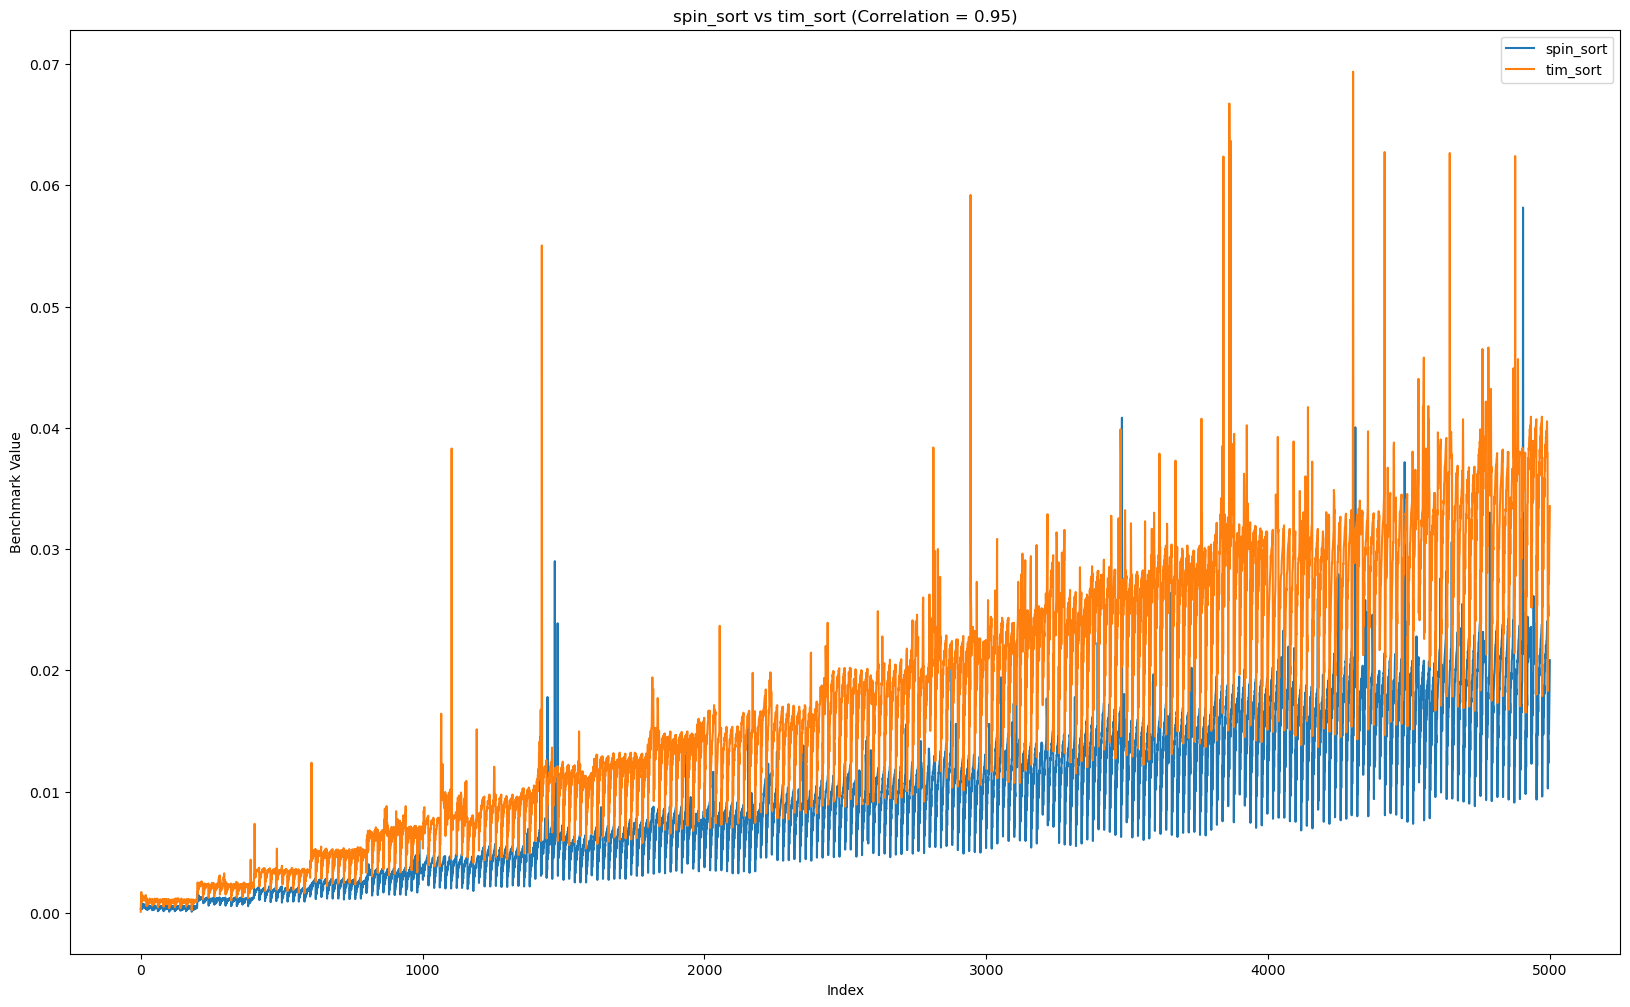

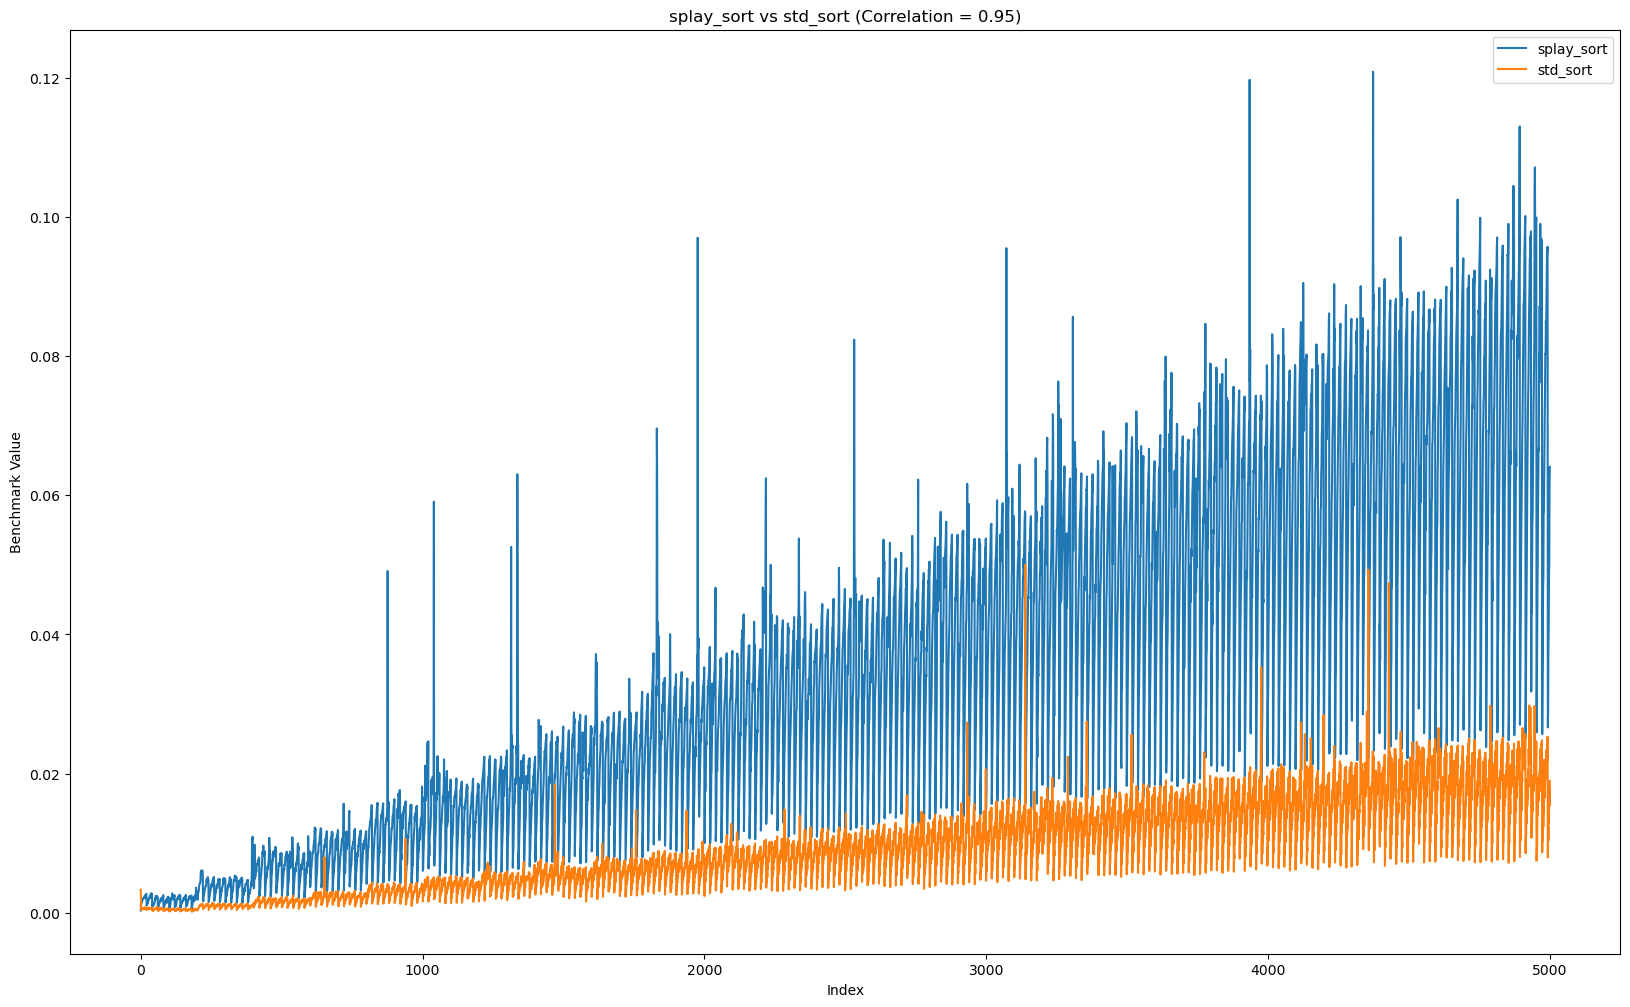

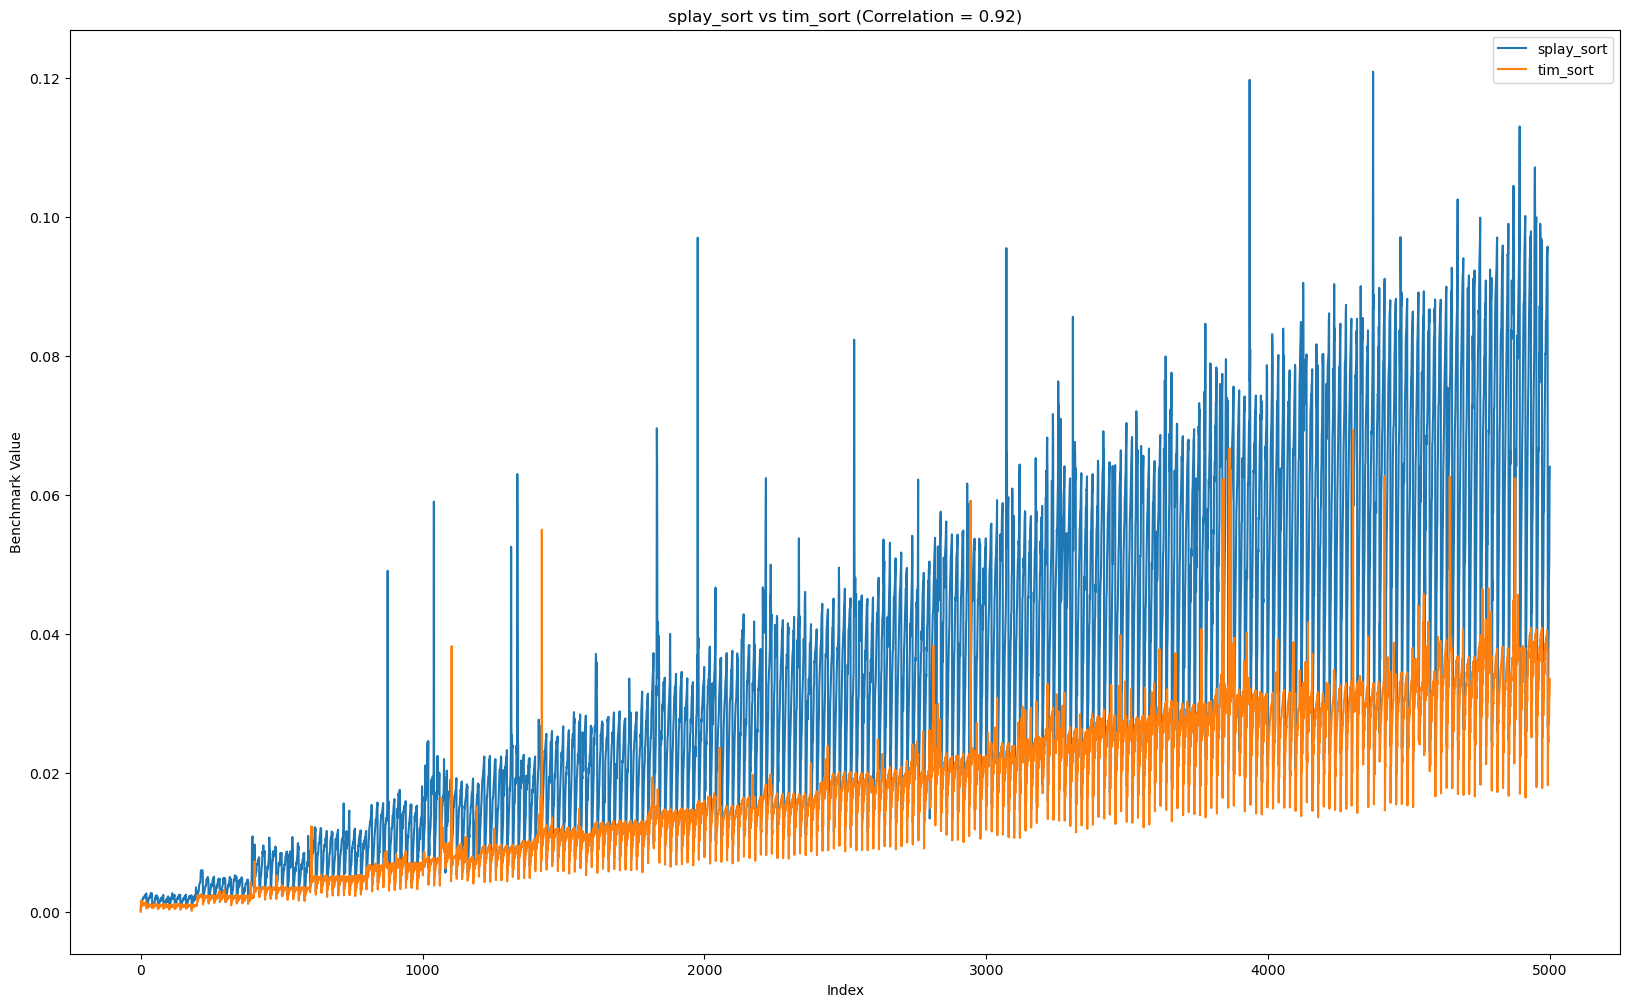

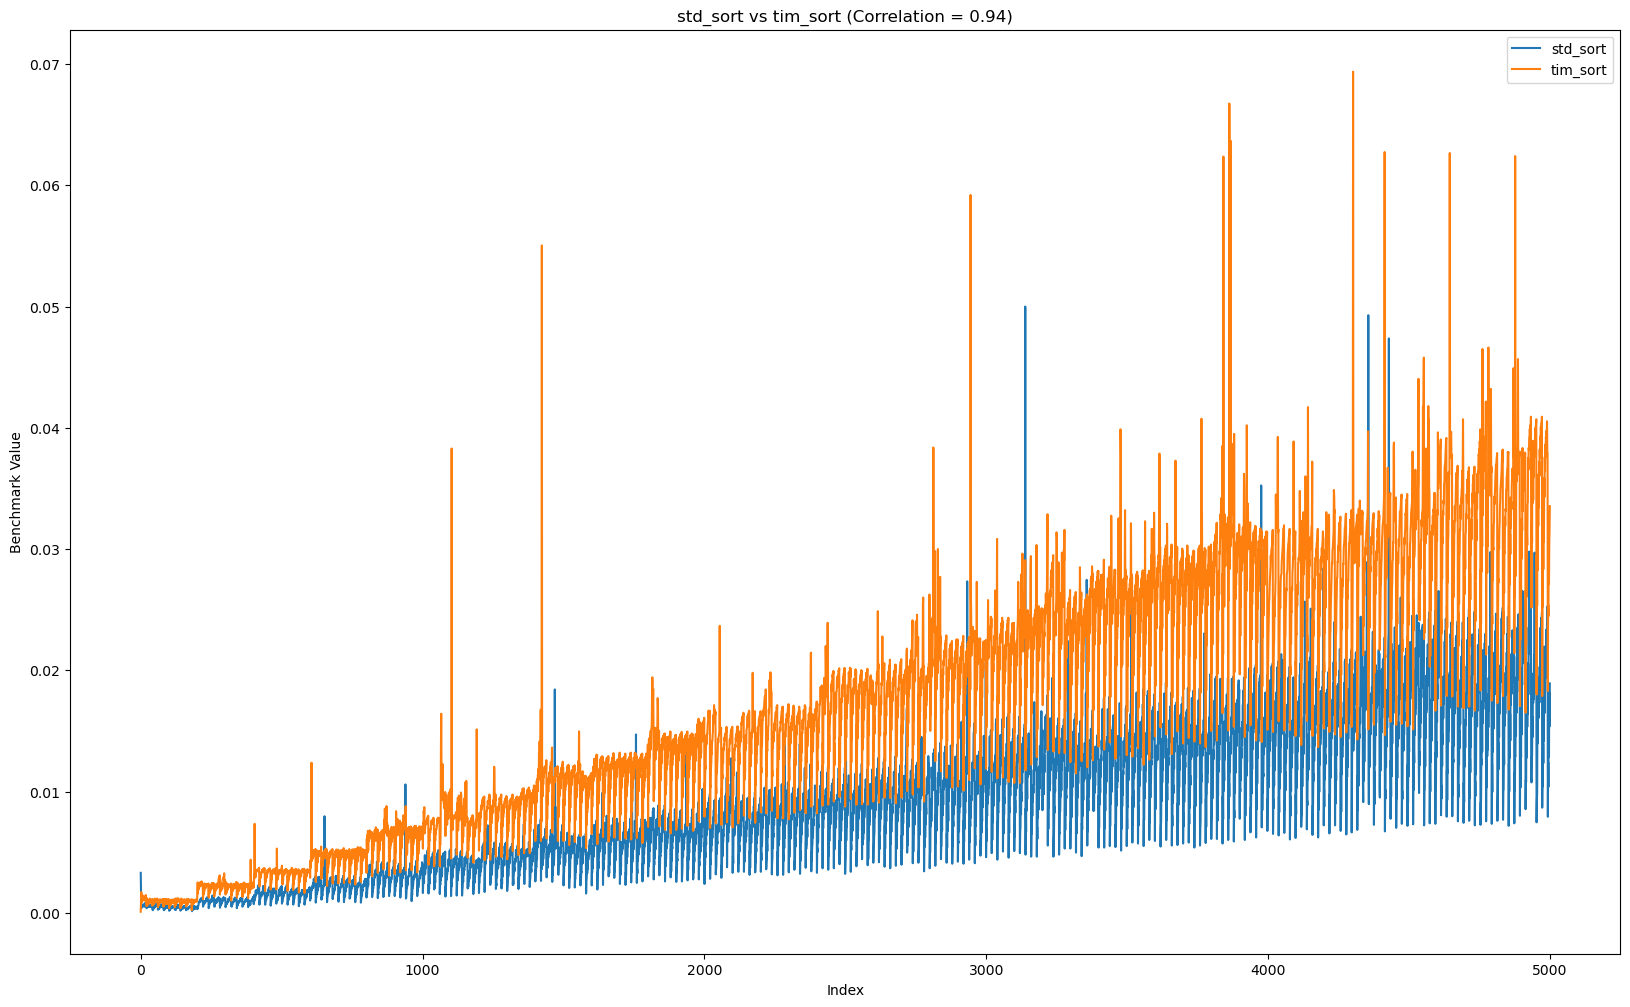

In [20]:
benchmark_cols = [col for col in df.columns if col != 'data']
corr_matrix = df[benchmark_cols].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
upper_tri = corr_matrix.where(mask)

high_corr_pairs = upper_tri.stack()[upper_tri.stack() > 0.9].index.tolist()

print("High correlation pairs (corr > 0.9):")
for col1, col2 in high_corr_pairs:
    print(f"{col1} and {col2} (corr = {corr_matrix.loc[col1, col2]:.2f})")

for col1, col2 in high_corr_pairs:
    plt.figure(figsize=(20, 12))
    plt.plot(df.index, df[col1], label=col1)
    plt.plot(df.index, df[col2], label=col2)
    corr_value = corr_matrix.loc[col1, col2]
    plt.title(f'{col1} vs {col2} (Correlation = {corr_value:.2f})')
    plt.xlabel('Index')
    plt.ylabel('Benchmark Value')
    plt.legend()
    plt.show()

In [21]:
benchmark_cols = [col for col in df.columns if col != 'data']
corr_matrix = df[benchmark_cols].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
upper_tri = corr_matrix.where(mask)

high_corr_pairs = upper_tri.stack()[upper_tri.stack() > 0.9].index.tolist()

print("High correlation pairs (corr > 0.9):")
for col1, col2 in high_corr_pairs:
    print(f"{col1} and {col2} (corr = {corr_matrix.loc[col1, col2]:.2f})")

High correlation pairs (corr > 0.9):
adaptive_shivers_sort and smooth_sort (corr = 0.91)
adaptive_shivers_sort and spin_sort (corr = 0.92)
adaptive_shivers_sort and std_sort (corr = 0.90)
adaptive_shivers_sort and tim_sort (corr = 0.92)
cartesian_tree_sort and slab_sort (corr = 0.92)
cartesian_tree_sort and smooth_sort (corr = 0.91)
cartesian_tree_sort and spin_sort (corr = 0.94)
cartesian_tree_sort and splay_sort (corr = 0.95)
cartesian_tree_sort and std_sort (corr = 0.94)
cartesian_tree_sort and tim_sort (corr = 0.93)
heap_sort and smooth_sort (corr = 0.92)
heap_sort and spin_sort (corr = 0.91)
heap_sort and tim_sort (corr = 0.92)
merge_sort and smooth_sort (corr = 0.91)
merge_sort and spin_sort (corr = 0.91)
merge_sort and tim_sort (corr = 0.91)
quick_sort and spin_sort (corr = 0.91)
quick_sort and splay_sort (corr = 0.91)
quick_sort and std_sort (corr = 0.91)
quick_merge_sort and spin_sort (corr = 0.90)
quick_merge_sort and splay_sort (corr = 0.90)
quick_merge_sort and tim_sort (co

In [28]:
import pandas as pd

race_results = {}

for col1, col2 in high_corr_pairs:
    race_df = pd.DataFrame({
        f'{col1}_time': df[col1],
        f'{col2}_time': df[col2]
    })
    race_df[f'{col1}_winner'] = (race_df[f'{col1}_time'] < race_df[f'{col2}_time']).astype(int)
    race_results[(col1, col2)] = race_df

for pair, race_df in race_results.items():
    print(f"Race results for pair {pair}:")
    print(race_df.head(), "\n")

Race results for pair ('adaptive_shivers_sort', 'smooth_sort'):
   adaptive_shivers_sort_time  smooth_sort_time  adaptive_shivers_sort_winner
0                    0.000459          0.000334                             0
1                    0.001833          0.002833                             1
2                    0.001625          0.003708                             1
3                    0.000875          0.002417                             1
4                    0.001292          0.003125                             1 

Race results for pair ('adaptive_shivers_sort', 'spin_sort'):
   adaptive_shivers_sort_time  spin_sort_time  adaptive_shivers_sort_winner
0                    0.000459        0.000333                             0
1                    0.001833        0.000375                             0
2                    0.001625        0.001416                             0
3                    0.000875        0.000417                             0
4                    0.0

In [32]:
import pandas as pd

race_results = {}

for col1, col2 in high_corr_pairs:
    race_df = pd.DataFrame({
        f'{col1}_time': df[col1],
        f'{col2}_time': df[col2]
    })
    race_df[f'{col1}_winner'] = (race_df[f'{col1}_time'] < race_df[f'{col2}_time']).astype(int)
    race_results[(col1, col2)] = race_df

threshold = 0.9  # Overwhelming win threshold (90%)
print("Pairs with an overwhelming winner:")
for pair, race_df in race_results.items():
    col1, col2 = pair
    win_rate = race_df[f'{col1}_winner'].mean()  # Fraction where col1 wins
    if win_rate >= threshold:
        print(f"{col1} overwhelmingly wins over {col2}: wins {win_rate*100:.1f}% of the races.")
    elif win_rate <= 1 - threshold:
        print(f"{col2} overwhelmingly wins over {col1}: wins {(1-win_rate)*100:.1f}% of the races.")

Pairs with an overwhelming winner:
adaptive_shivers_sort overwhelmingly wins over smooth_sort: wins 98.7% of the races.
spin_sort overwhelmingly wins over adaptive_shivers_sort: wins 99.8% of the races.
std_sort overwhelmingly wins over adaptive_shivers_sort: wins 99.7% of the races.
cartesian_tree_sort overwhelmingly wins over slab_sort: wins 93.9% of the races.
cartesian_tree_sort overwhelmingly wins over smooth_sort: wins 99.6% of the races.
spin_sort overwhelmingly wins over cartesian_tree_sort: wins 99.0% of the races.
cartesian_tree_sort overwhelmingly wins over splay_sort: wins 99.6% of the races.
std_sort overwhelmingly wins over cartesian_tree_sort: wins 99.5% of the races.
heap_sort overwhelmingly wins over smooth_sort: wins 99.8% of the races.
heap_sort overwhelmingly wins over tim_sort: wins 96.1% of the races.
merge_sort overwhelmingly wins over smooth_sort: wins 99.8% of the races.
spin_sort overwhelmingly wins over merge_sort: wins 90.5% of the races.
merge_sort overwhel